### Install Libraries

In [264]:
import sys
#!{sys.executable} -m pip install Chefboost --upgrade
#!{sys.executable} -m pip install Seaborn 
# !conda install --yes --prefix {sys.prefix} -c conda-forge xgboost

### Import Libraries

In [255]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from chefboost import Chefboost as chef
from sklearn.model_selection import KFold
import pprint
import shutil
from pathlib import Path
import os
import math
import seaborn as sns
import libsvm
from libsvm.svmutil import *
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from joblib import dump, load
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
import json

import xgboost as xgb

pp = pprint.PrettyPrinter(indent=4)

### Import, Clean, & Analyze Dev Data 


Feature: 2: Driving_to
	Unique Values:
	['No Urgent Place' 'Work' 'Home']
unique vals ['No Urgent Place', 'Work', 'Home']
t_counts [0.6359882005899705, 0.5051916932907349, 0.5028901734104047]
f_counts [0.3640117994100295, 0.4948083067092652, 0.49710982658959535]


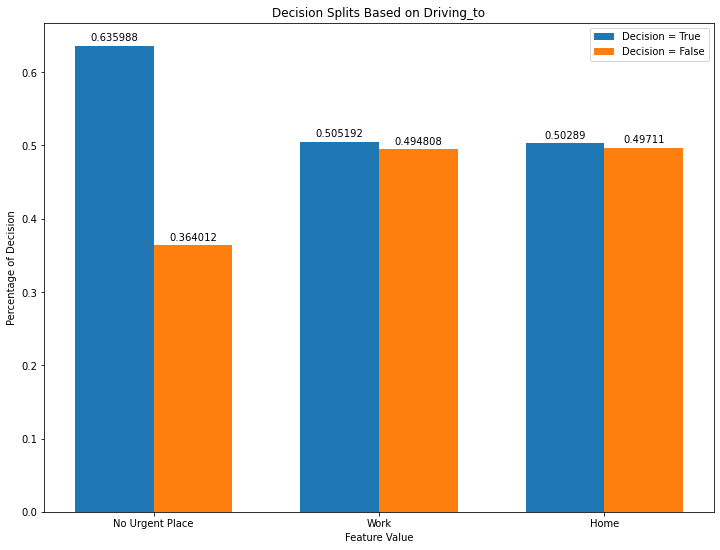


Feature: 3: Passanger
	Unique Values:
	['Partner' 'Alone' 'Kid(s)' 'Friend(s)']
unique vals ['Partner', 'Alone', 'Kid(s)', 'Friend(s)']
t_counts [0.5919540229885057, 0.5255399382927666, 0.5087281795511222, 0.6777445855115758]
f_counts [0.40804597701149425, 0.4744600617072335, 0.4912718204488778, 0.3222554144884242]


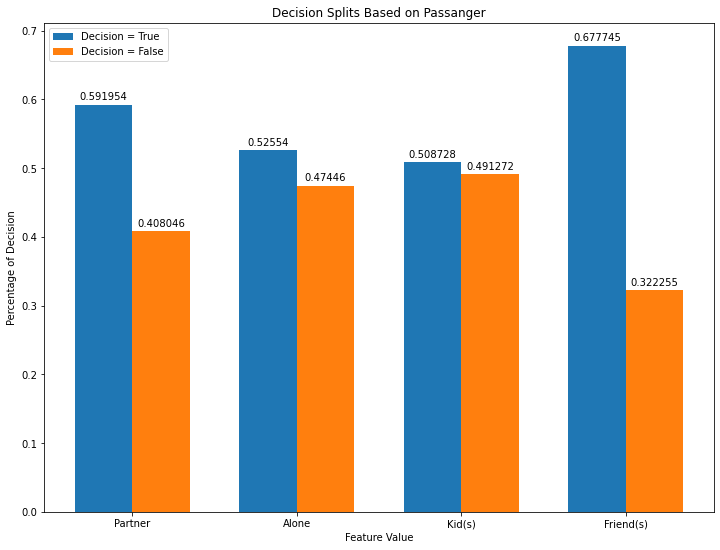


Feature: 2: Weather
	Unique Values:
	['Sunny' 'Rainy' 'Snowy']
unique vals ['Sunny', 'Rainy', 'Snowy']
t_counts [0.599677859001363, 0.46153846153846156, 0.45155555555555554]
f_counts [0.4003221409986371, 0.5384615384615384, 0.5484444444444444]


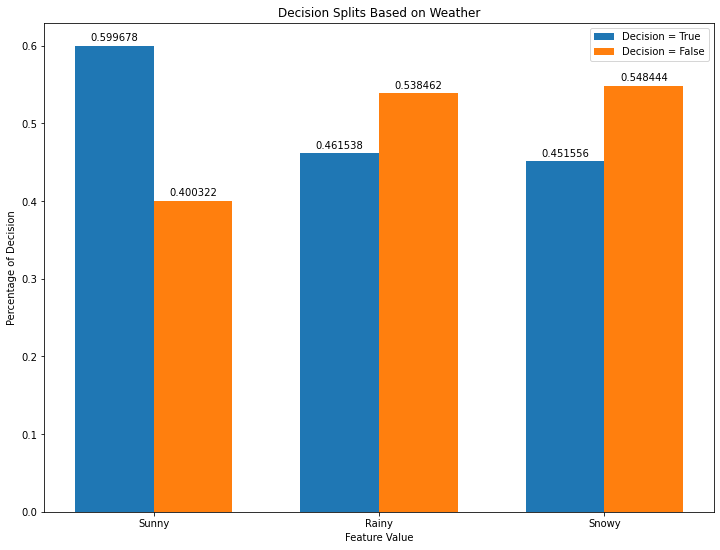


Feature: 2: Temperature
	Unique Values:
	[80 55 30]
unique vals [80, 55, 30]
t_counts [0.6050228310502284, 0.5386614684860299, 0.5221621621621622]
f_counts [0.3949771689497717, 0.4613385315139701, 0.47783783783783784]


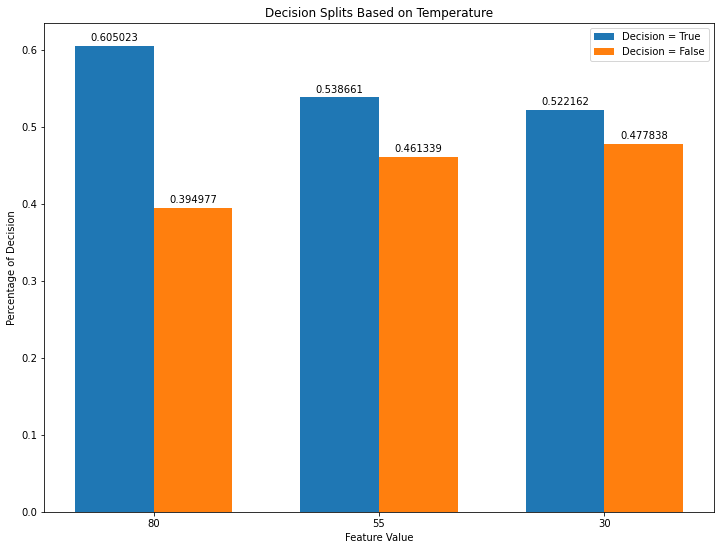


Feature: 4: Time
	Unique Values:
	['6PM' '7AM' '2PM' '10PM' '10AM']
unique vals ['6PM', '7AM', '2PM', '10PM', '10AM']
t_counts [0.5881904761904762, 0.5051916932907349, 0.6727272727272727, 0.5027967681789932, 0.6012965964343598]
f_counts [0.4118095238095238, 0.4948083067092652, 0.32727272727272727, 0.49720323182100684, 0.3987034035656402]


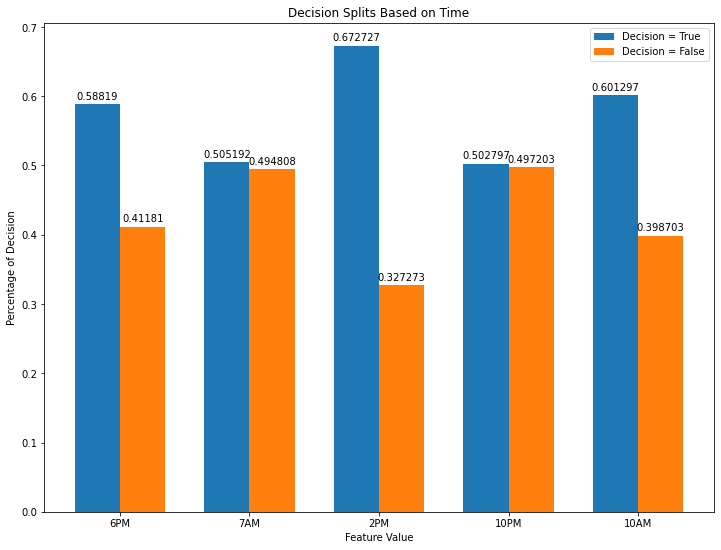


Feature: 4: Coupon
	Unique Values:
	['Bar' 'Restaurant(20-50)' 'Restaurant(<20)' 'Carry out & Take away'
 'Coffee House']
unique vals ['Bar', 'Restaurant(20-50)', 'Restaurant(<20)', 'Carry out & Take away', 'Coffee House']
t_counts [0.40417690417690416, 0.44574290484140233, 0.7050423917893798, 0.7380073800738007, 0.506832298136646]
f_counts [0.5958230958230958, 0.5542570951585977, 0.2949576082106203, 0.26199261992619927, 0.493167701863354]


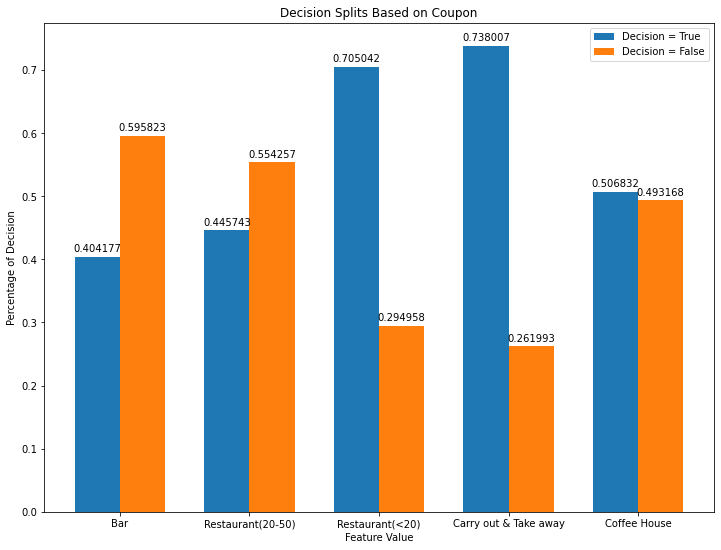


Feature: 1: Coupon_validity
	Unique Values:
	['1d' '2h']
unique vals ['1d', '2h']
t_counts [0.6257289273723272, 0.5001104972375691]
f_counts [0.37427107262767273, 0.49988950276243094]


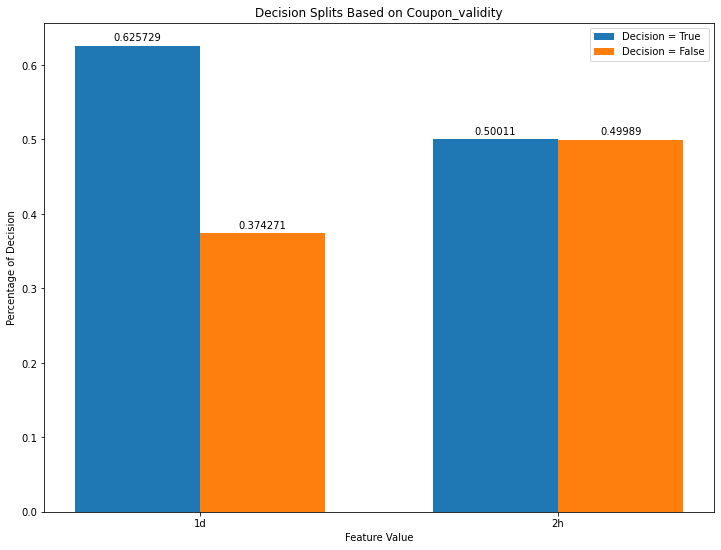


Feature: 1: Gender
	Unique Values:
	['Male' 'Female']
unique vals ['Male', 'Female']
t_counts [0.5908908507223114, 0.5498076923076923]
f_counts [0.4091091492776886, 0.45019230769230767]


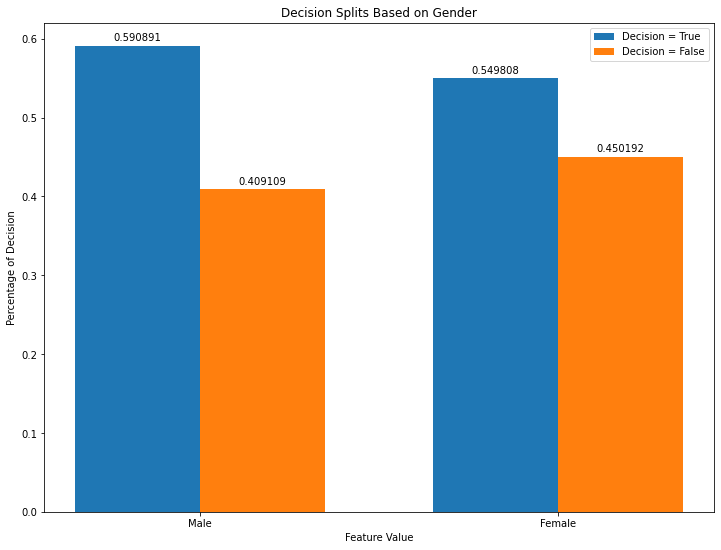


Feature: 7: Age
	Unique Values:
	['31' '26' '50plus' '41' '21' 'below21' '36' '46']
unique vals ['31', '26', '50plus', '41', '21', 'below21', '36', '46']
t_counts [0.5494095711622126, 0.5998013902681232, 0.5065472088215024, 0.5653179190751445, 0.5997191011235955, 0.6289592760180995, 0.5452898550724637, 0.5808170515097691]
f_counts [0.45059042883778744, 0.4001986097318769, 0.4934527911784976, 0.4346820809248555, 0.4002808988764045, 0.37104072398190047, 0.45471014492753625, 0.4191829484902309]


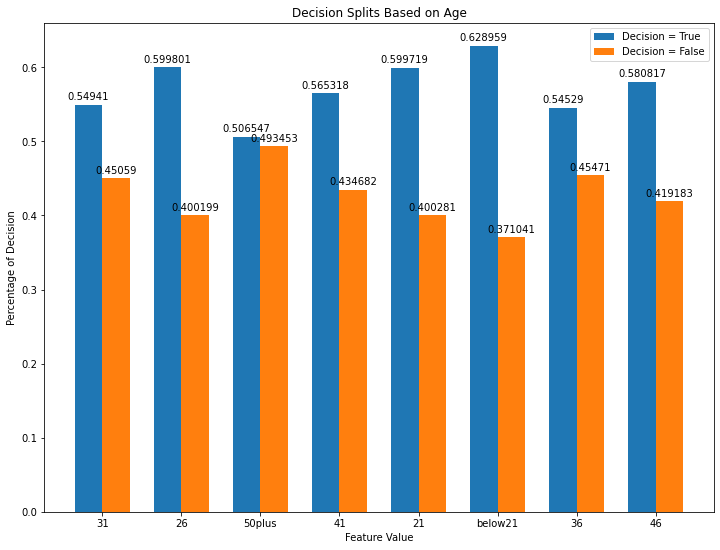


Feature: 4: Maritalstatus
	Unique Values:
	['Married partner' 'Single' 'Unmarried partner' 'Divorced' 'Widowed']
unique vals ['Married partner', 'Single', 'Unmarried partner', 'Divorced', 'Widowed']
t_counts [0.5467312348668281, 0.6033210332103321, 0.5691244239631337, 0.5285714285714286, 0.4519230769230769]
f_counts [0.45326876513317194, 0.3966789667896679, 0.4308755760368664, 0.4714285714285714, 0.5480769230769231]


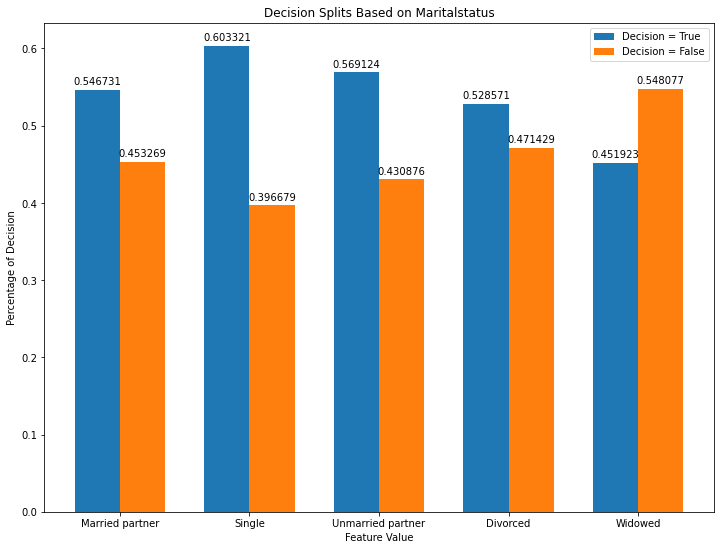


Feature: 1: Children
	Unique Values:
	[0 1]
unique vals [0, 1]
t_counts [0.5912824811399833, 0.53970135103105]
f_counts [0.4087175188600168, 0.46029864896895]


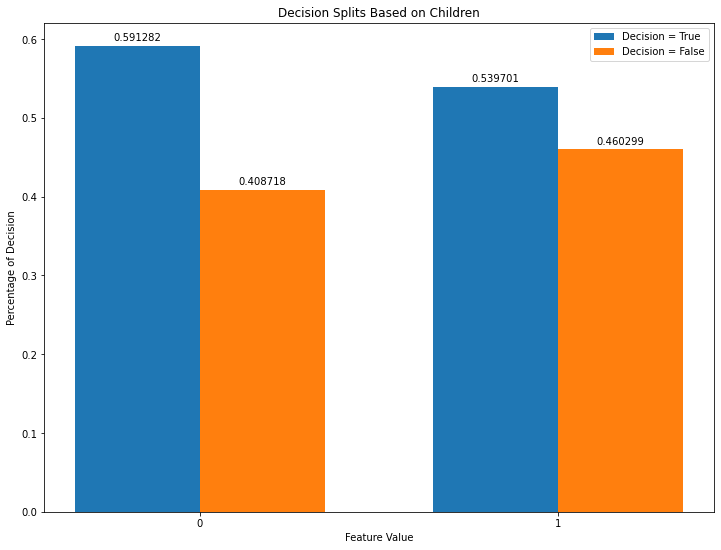


Feature: 5: Education
	Unique Values:
	['Some college - no degree' 'Associates degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'High School Graduate'
 'Some High School']
unique vals ['Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'High School Graduate', 'Some High School']
t_counts [0.5970361926474779, 0.5556745182012848, 0.5578643578643578, 0.5197853789403085, 0.6041958041958042, 0.7142857142857143]
f_counts [0.4029638073525221, 0.4443254817987152, 0.44213564213564216, 0.4802146210596915, 0.3958041958041958, 0.2857142857142857]


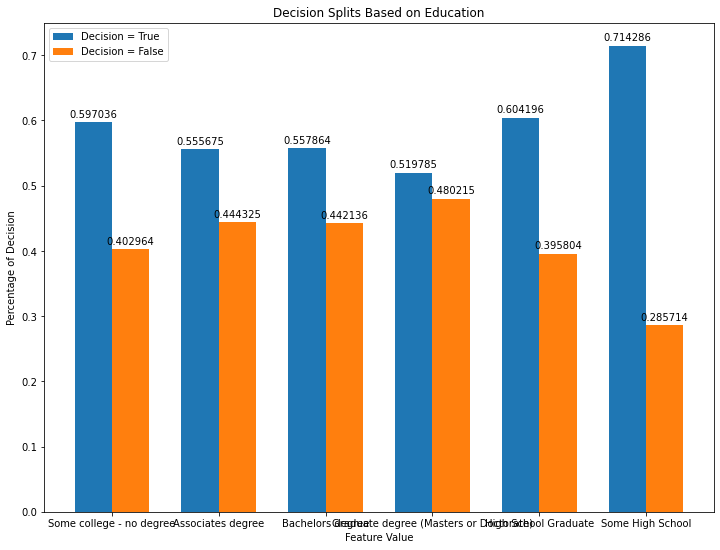


Feature: 24: Occupation
	Unique Values:
	['Construction & Extraction' 'Unemployed'
 'Arts Design Entertainment Sports & Media'
 'Food Preparation & Serving Related' 'Education&Training&Library'
 'Sales & Related' 'Computer & Mathematical' 'Student'
 'Architecture & Engineering' 'Business & Financial'
 'Office & Administrative Support' 'Retired' 'Management'
 'Life Physical Social Science' 'Healthcare Support'
 'Building & Grounds Cleaning & Maintenance' 'Legal'
 'Installation Maintenance & Repair' 'Protective Service'
 'Healthcare Practitioners & Technical' 'Community & Social Services'
 'Transportation & Material Moving' 'Personal Care & Service'
 'Farming Fishing & Forestry' 'Production Occupations']
unique vals ['Construction & Extraction', 'Unemployed', 'Arts Design Entertainment Sports & Media', 'Food Preparation & Serving Related', 'Education&Training&Library', 'Sales & Related', 'Computer & Mathematical', 'Student', 'Architecture & Engineering', 'Business & Financial', 'Office 

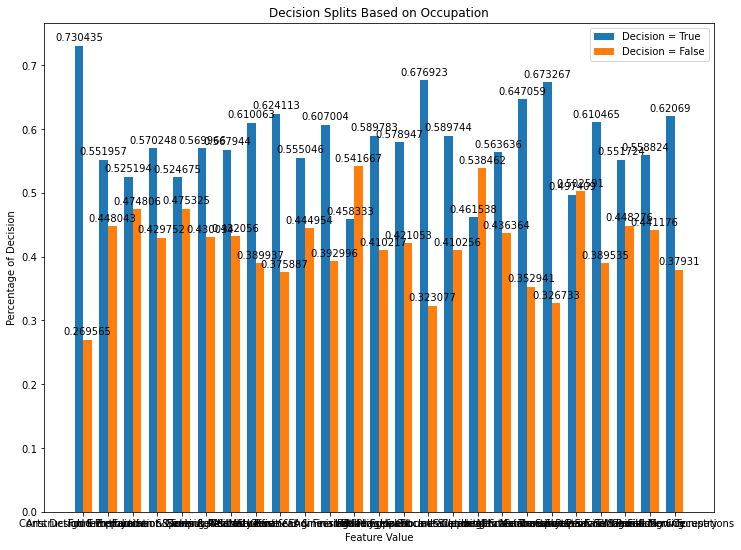


Feature: 8: Income
	Unique Values:
	['$100000 or More' '$62500 - $74999' '$37500 - $49999' '$12500 - $24999'
 '$25000 - $37499' '$75000 - $87499' '$50000 - $62499' '$87500 - $99999'
 'Less than $12500']
unique vals ['$100000 or More', '$62500 - $74999', '$37500 - $49999', '$12500 - $24999', '$25000 - $37499', '$75000 - $87499', '$50000 - $62499', '$87500 - $99999', 'Less than $12500']
t_counts [0.5717344753747323, 0.5412979351032449, 0.5675675675675675, 0.5775116433799069, 0.5982532751091703, 0.4841040462427746, 0.5959970348406227, 0.5312934631432545, 0.5882352941176471]
f_counts [0.4282655246252677, 0.45870206489675514, 0.43243243243243246, 0.42248835662009315, 0.4017467248908297, 0.5158959537572254, 0.40400296515937734, 0.46870653685674546, 0.4117647058823529]


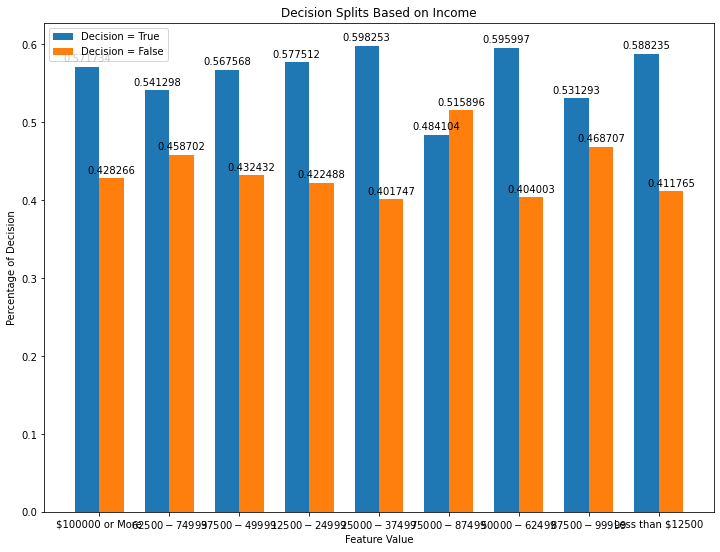


Feature: 5: Bar
	Unique Values:
	[ 2.  0.  1.  3.  4. nan]
unique vals [2.0, 0.0, 1.0, 3.0, 4.0, nan]
t_counts [0.6227937468482098, 0.5301610189858207, 0.5688793718772306, 0.6416184971098265, 0.5857142857142857, 0]
f_counts [0.37720625315179024, 0.46983898101417926, 0.43112062812276947, 0.3583815028901734, 0.4142857142857143, 0]


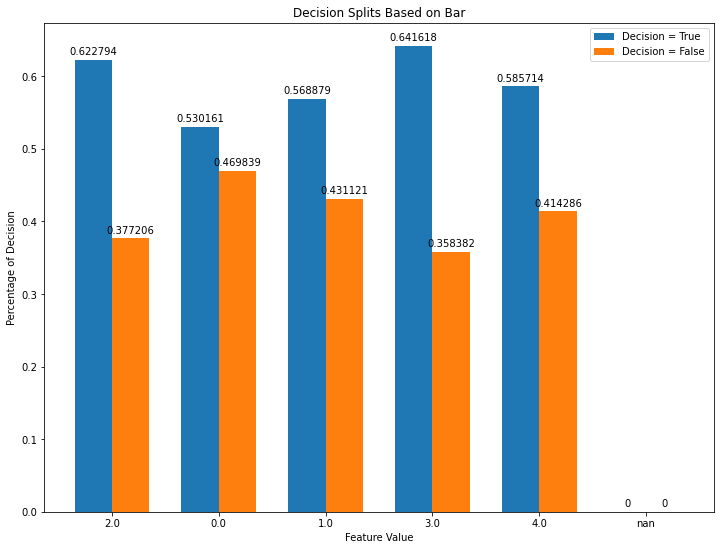


Feature: 5: Coffeehouse
	Unique Values:
	[ 0.  1.  2.  4.  3. nan]
unique vals [0.0, 1.0, 2.0, 4.0, 3.0, nan]
t_counts [0.46847228099873045, 0.5441553682667644, 0.6536979969183359, 0.578708946772367, 0.6352201257861635, 0]
f_counts [0.5315277190012696, 0.45584463173323564, 0.3463020030816641, 0.42129105322763305, 0.36477987421383645, 0]


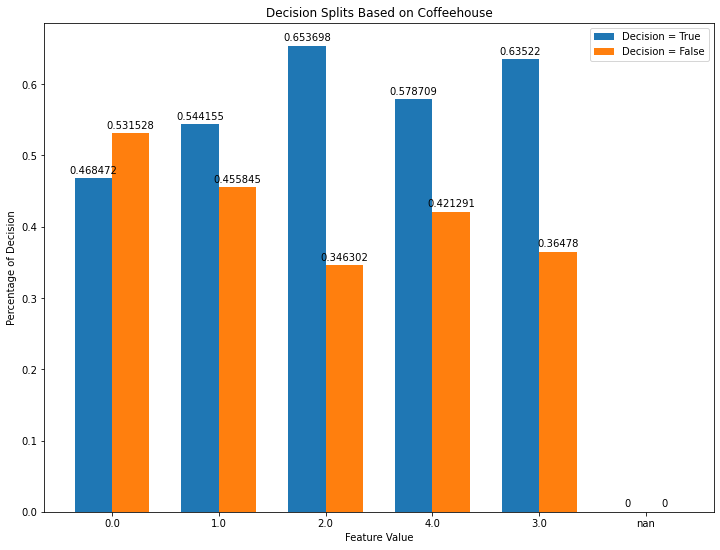


Feature: 5: Carryaway
	Unique Values:
	[ 3.  4.  1.  2. nan  0.]
unique vals [3.0, 4.0, 1.0, 2.0, nan, 0.0]
t_counts [0.5823788546255506, 0.5698500394632992, 0.502301117685733, 0.5837996269650946, 0, 0.5309734513274337]
f_counts [0.41762114537444933, 0.43014996053670085, 0.49769888231426695, 0.4162003730349054, 0, 0.4690265486725664]


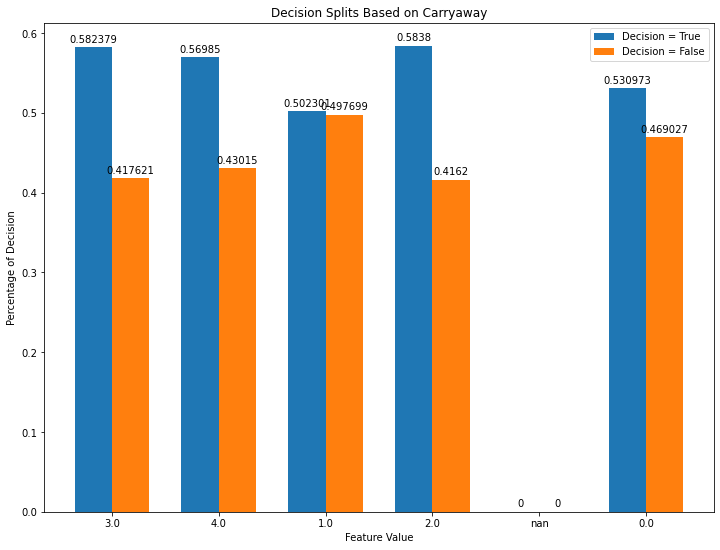


Feature: 5: Restaurantlessthan20
	Unique Values:
	[ 2.  3.  1.  4.  0. nan]
unique vals [2.0, 3.0, 1.0, 4.0, 0.0, nan]
t_counts [0.5644186046511628, 0.5888237323214902, 0.5289256198347108, 0.5960199004975124, 0.56353591160221, 0]
f_counts [0.4355813953488372, 0.41117626767850984, 0.47107438016528924, 0.4039800995024876, 0.43646408839779005, 0]


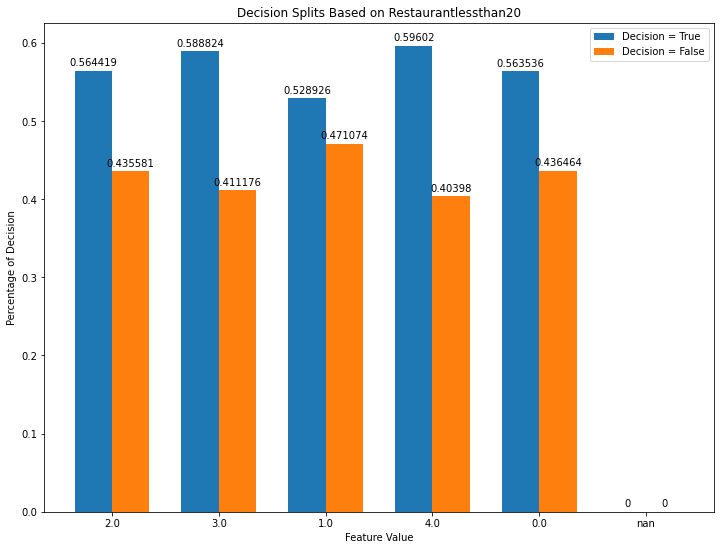


Feature: 5: Restaurant20to50
	Unique Values:
	[ 2.  0.  1. nan  3.  4.]
unique vals [2.0, 0.0, 1.0, nan, 3.0, 4.0]
t_counts [0.6008323874385169, 0.5174418604651163, 0.5576962492313999, 0, 0.6598639455782312, 0.6551724137931034]
f_counts [0.39916761256148314, 0.48255813953488375, 0.4423037507686001, 0, 0.3401360544217687, 0.3448275862068966]


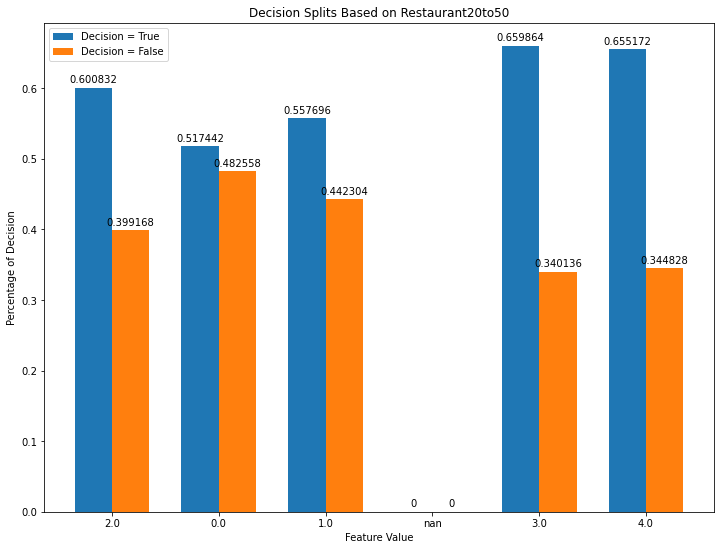


Feature: 1: Direction_same
	Unique Values:
	[0 1]
unique vals [0, 1]
t_counts [0.565596216081653, 0.586046511627907]
f_counts [0.43440378391834705, 0.413953488372093]


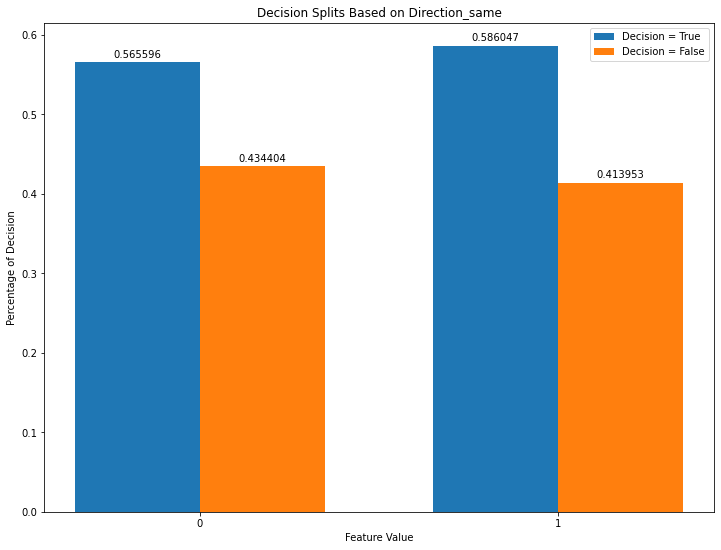


Feature: 2: Distance
	Unique Values:
	[2 1 3]
unique vals [2, 1, 3]
t_counts [0.5637569060773481, 0.617534370069867, 0.4198036006546645]
f_counts [0.4362430939226519, 0.382465629930133, 0.5801963993453355]


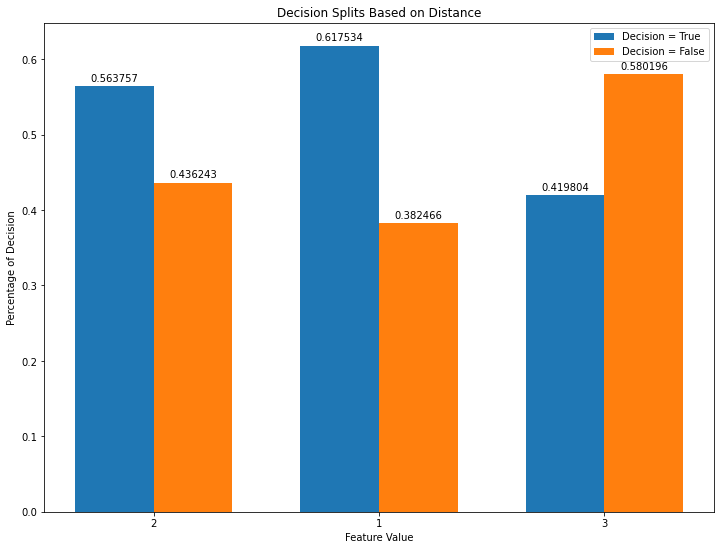

In [3]:

###################################
def plot_results(x_labels,y1,y2,feature_name):

    fig, ax = plt.subplots()
    width=0.35
    x = range(len(x_labels))
    x_spacing = np.arange(len(x_labels))
    c1 = ax.bar(x_spacing - width/2, y1, width, label='Decision = True')
    c2 = ax.bar(x_spacing + width/2, y2, width, label='Decision = False')

    ax.set_ylabel('Percentage of Decision')
    ax.set_xlabel('Feature Value')
    ax.set_title(f'Decision Splits Based on {feature_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.legend()

    ax.bar_label(c1, padding=3)
    ax.bar_label(c2, padding=3)

    fig.set_size_inches(12, 9)

    plt.show()
    
    
###################################

# --- 1. Import Data ---
dev = pd.read_csv("data/train.csv")

# --- 2. Clean Data ---

# # Change decision column to boolean
dev["Decision"] = dev["Decision"].astype('bool')

# Want to move Decision feature to end
dev = dev[[c for c in dev if c != 'Decision'] + ['Decision']]

# --- 3. Analyze Data ---
# Split by decision value
dev_t = dev[dev.Decision==True]
dev_f = dev[dev.Decision==False]

#look at unique values for all features, plot feature values vs decision
true_false_diff = []
for i,feature_name in enumerate(dev):
    if feature_name in ['id', 'Decision']: continue
    feature = dev[feature_name]
    unique_vals = feature.unique()    
    t_counts = []
    f_counts = []
    tf_ratios = []
    for i,val in enumerate(unique_vals):
        t_count = len(dev_t[dev_t[feature_name] == val])
        f_count = len(dev_f[dev_f[feature_name] == val])
        total_count = t_count+f_count
        t_counts.append(t_count/total_count if total_count > 0 else 0)
        f_counts.append(f_count/total_count if total_count > 0 else 0)
        
        # Add T/F diffs to list
        true_false_diff.append(
            {"diff": abs(t_count-f_count)/total_count if total_count !=0 else 0,
            "feature": feature_name,
            "value": val 
            }
        )
    
    print(f'\nFeature: {i}: {feature_name}\n\tUnique Values:\n\t{unique_vals}') 
    print("unique vals",unique_vals.tolist())
    print('t_counts',t_counts)
    print('f_counts',f_counts)
    plot_results(unique_vals.tolist(),t_counts,f_counts,feature_name)  
    

In [4]:

# Look at features/values with highest T/F diffs
tfdf = pd.DataFrame(true_false_diff)
tfdf1 = tfdf.sort_values(by=['diff'])

print("\nFrom the above charts, the follwoing features/values had the largest difference in decision values, \
making them likely candidates to explore for ML models:")
print(tfdf1.tail(10))

# Look at features with the highest average T/F diffs
tfdf_features = [{"feature": feature,
                  "avg_diff": tfdf.loc[tfdf['feature'] == feature]['diff'].mean()} 
                 for feature in tfdf["feature"].unique()]

tfdf_features = pd.DataFrame(tfdf_features)
print("\nFrom the above charts, the follwoing features had the largest average difference in decision values, \
making them likely candidates to explore for ML models:")
print(tfdf_features.sort_values(by=['avg_diff']).tail(5))

# Save Top 5 Features to Array
top_5_features = tfdf_features.sort_values(by=['avg_diff']).tail(5)['feature'].unique()
print("top_5_features:", top_5_features)


From the above charts, the follwoing features/values had the largest difference in decision values, making them likely candidates to explore for ML models:
         diff           feature                                 value
111  0.310345  Restaurant20to50                                   4.0
110  0.319728  Restaurant20to50                                   3.0
15   0.345455              Time                                   2PM
67   0.346535        Occupation  Healthcare Practitioners & Technical
62   0.353846        Occupation                    Healthcare Support
6    0.355489         Passanger                             Friend(s)
20   0.410085            Coupon                       Restaurant(<20)
47   0.428571         Education                      Some High School
48   0.460870        Occupation             Construction & Extraction
21   0.476015            Coupon                 Carry out & Take away

From the above charts, the follwoing features had the largest average di

# Models

## Decision Trees

### CART

In [9]:
### CART With All Features
# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev)

# Change decision column to str
dev1["Decision"] = dev1["Decision"].astype('str')

# Remove id column
dev1.drop("id",axis=1, inplace=True)

# Split Data into 3 Folds & Get Average Accuracy
num_splits = 3
kf = KFold(n_splits=num_splits, shuffle=True , random_state=22)

# Loop over different values for parameter max_depth to compare performance
cart_avg_accuracies = []
max_depths =  [1]
for max_depth in max_depths:
    cart_avg_accuracy = 0
    print(f"\n\n\n-----\nMax depth:{max_depth}\n")
    for i, (train_index, test_index) in enumerate(kf.split(dev1)):
        train_set = dev1.iloc[train_index]
        test_set = dev1.iloc[test_index]

        # Run CART algorithm to create model
        print("----- Training CART -----")
        cart_config = {'algorithm': 'CART', 'enableParallelism': True, 'max_depth': max_depth}
        cart_model = chef.fit(train_set, config = cart_config)
        print("----- ------------ -----")

        # Test CART algorithm
        print("----- Testing CART -----")
        cart_eval = evaluate_mod(cart_model, test_set, task="test") # Run code below first
        pp.pprint(cart_eval)
        cart_avg_accuracy += cart_eval['accuracy']
        print("----- ----------- -----")
        
        # Move output model so it doesn't get overwritten
        save_dir = f"outputs/rules/CART/maxdepth_{max_depth}/{i}"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        for ftype in ['py','json']: 
            shutil.move(f"outputs/rules/rules.{ftype}", save_dir+f"/rules.{ftype}") 

    cart_avg_accuracy /= num_splits
    cart_avg_accuracies.append(CART_avg_accuracy)
    
for i in range(len(max_depths)):
    print(f"cart_avg_accuracy was {cart_avg_accuracies[i]} for parameter max_depth={max_depths[i]}")




-----
Max depth:1

----- Training ID3 -----
[INFO]:  8 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  201.34577775001526  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  96.42576590730557 % on  5092  instances
Labels:  ['False' 'True']
Confusion matrix:  [[2045, 65], [117, 2865]]
Precision:  96.9194 %, Recall:  94.5883 %, F1:  95.7397 %
----- ------------ -----
----- Testing IC3 -----


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/chefboost/commons/functions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = predictions


{   'accuracy': 61.54752553024352,
    'accuracy2': 61.5475,
    'confusion_matrix': [[1913, 997], [961, 1221]],
    'decision_class': 'True',
    'f1_score': 66.148,
    'labels': array(['True', 'False'], dtype=object),
    'precision': 65.7388,
    'recall': 66.5623}
----- ----------- -----
----- Training ID3 -----
[INFO]:  8 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  230.35055994987488  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  96.62215239591517 % on  5092  instances
Labels:  ['True' 'False']
Confusion matrix:  [[2807, 105], [67, 2113]]
Precision:  96.3942 %, Recall:  97.6688 %, F1:  97.0273 %
----- ------------ -----
----- Testing IC3 -----
{   'accuracy': 62.3134328358209,
    'accuracy2': 62.3134,
    'confusion_matrix': [[1233, 990], [929, 1940]],
    'decision_class': 'False',
    'f1_score': 56.2372,
    'labels': array(['False', 'True'], dtype=object

In [58]:
### ID3 With Top n Features Only
avg_accuracies_per_feature = []
for num_features in range(6,10): #range(2,tfdf_features.count()['feature']):

    # Save Top n Features to Array
    top_n_features = tfdf_features.sort_values(by=['avg_diff']).tail(num_features)['feature'].unique()
    print("top_n_features:", top_n_features)

    dev1 = dev.copy()

    # Remove all but top n features with regards to T/F diff averages
    dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]

    # Map object features to ints
    dev1, dtypedict = map_object_columns_to_int(dev1)

    # Change decision column to str
    dev1["Decision"] = dev1["Decision"].astype('str')

    # Split Data into 5 Folds & Get Average Accuracy
    num_splits = 5
    kf = KFold(n_splits=num_splits, shuffle=True , random_state=22)

    # Loop over different values for parameter max_depth to compare performance
    max_depths =  [1,3,5,10,20]
    for max_depth in max_depths:
        id3_avg_accuracy = 0
        print(f"\n\n-----\nMax depth:{max_depth}")
        for i, (train_index, test_index) in enumerate(kf.split(dev1)):
            train_set = dev1.iloc[train_index]
            test_set = dev1.iloc[test_index]

            # Run ID3 algorithm to create model
#             print("----- Training ID3 -----")
            id3_config = {'algorithm': 'ID3', 'enableParallelism': True, 'max_depth': max_depth}
            id3_model = chef.fit(train_set, config = id3_config)
#             print("----- ------------ -----")

            # Test ID3 algorithm
#             print("----- Testing ID3 -----")
            id3_eval = evaluate_mod(id3_model, test_set, task="test") # Run code below first
#             pp.pprint(id3_eval)
            id3_avg_accuracy += id3_eval['accuracy']
#             print("----- ----------- -----")

            # Move output model so it doesn't get overwritten
            save_dir = f"outputs/rules/ID3/{num_features}_features/maxdepth_{max_depth}/{i}"
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            for ftype in ['py','json']: 
                shutil.move(f"outputs/rules/rules.{ftype}", save_dir+f"/rules.{ftype}") 

        id3_avg_accuracy /= num_splits
        avg_accuracies_per_feature.append({
            "num_features": num_features,
            "max_depth": max_depth,
            "avg_accuracy": id3_avg_accuracy
        }
        )


top_n_features: ['Passanger' 'Restaurant20to50' 'Distance' 'Occupation' 'Education'
 'Coupon']


-----
Max depth:1
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/chefboost/training/Preprocess.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = np.where(df[column_name] <= winner_threshold, "<="+str(winner_threshold), ">"+str(winner_threshold))
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/chefboost/training/Training.py:386: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df_copy[column_name]


-------------------------
finished in  11.554771900177002  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.495765312384925 % on  8147  instances
Labels:  ['False' 'True']
Confusion matrix:  [[1383, 873], [2101, 3790]]
Precision:  61.3032 %, Recall:  39.6958 %, F1:  48.1882 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  10.374735832214355  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.63078433779305 % on  8147  instances
Labels:  ['True' 'False']
Confusion matrix:  [[3784, 2085], [878, 1400]]
Precision:  64.4744 %, Recall:  81.1669 %, F1:  71.8641 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  10.842435121536255  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.58168651037192 % o

-------------------------
finished in  11.046626806259155  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.495765312384925 % on  8147  instances
Labels:  ['False' 'True']
Confusion matrix:  [[1383, 873], [2101, 3790]]
Precision:  61.3032 %, Recall:  39.6958 %, F1:  48.1882 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  10.15136194229126  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.63078433779305 % on  8147  instances
Labels:  ['True' 'False']
Confusion matrix:  [[3784, 2085], [878, 1400]]
Precision:  64.4744 %, Recall:  81.1669 %, F1:  71.8641 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  10.567758083343506  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.58168651037192 % on

-------------------------
finished in  17.829148292541504  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.64305879464834 % on  8147  instances
Labels:  ['False' 'True']
Confusion matrix:  [[1351, 829], [2133, 3834]]
Precision:  61.9725 %, Recall:  38.7773 %, F1:  47.7048 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  16.08815097808838  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.79035227691175 % on  8147  instances
Labels:  ['True' 'False']
Confusion matrix:  [[3729, 2017], [933, 1468]]
Precision:  64.8973 %, Recall:  79.9871 %, F1:  71.6564 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  17.233366012573242  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.65533325150362 % on 

-------------------------
finished in  32.51373100280762  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.79685773904505 % on  8147  instances
Labels:  ['False' 'True']
Confusion matrix:  [[1358, 742], [2126, 3921]]
Precision:  64.6667 %, Recall:  38.9782 %, F1:  48.639 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  29.212313652038574  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.31238492696698 % on  8147  instances
Labels:  ['True' 'False']
Confusion matrix:  [[3850, 2014], [812, 1471]]
Precision:  65.6548 %, Recall:  82.5826 %, F1:  73.1522 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  28.37344789505005  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.9073278507426 % on  81

-------------------------
finished in  49.15000295639038  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.77881428746778 % on  8147  instances
Labels:  ['False' 'True']
Confusion matrix:  [[1478, 782], [2006, 3881]]
Precision:  65.3982 %, Recall:  42.4225 %, F1:  51.4624 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  49.95454168319702  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.13477353627103 % on  8147  instances
Labels:  ['True' 'False']
Confusion matrix:  [[3845, 1942], [817, 1543]]
Precision:  66.442 %, Recall:  82.4753 %, F1:  73.5955 %
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  49.28530693054199  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.08567570884988 % on  81

In [281]:
# Save ID3 Model for prod data
num_features = 8
# Save Top n Features to Array
top_n_features = tfdf_features.sort_values(by=['avg_diff']).tail(num_features)['feature'].unique()
print("top_n_features:", top_n_features)

dev1 = dev.copy()

# Remove all but top n features with regards to T/F diff averages
dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Change decision column to str
dev1["Decision"] = dev1["Decision"].astype('str')

# Split Data into 5 Folds & Get Average Accuracy
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True , random_state=22)
# Loop over different values for parameter max_depth to compare performance
max_depths =  [1]
for max_depth in max_depths:
    id3_avg_accuracy = 0
    print(f"\n\n-----\nMax depth:{max_depth}")
    for i, (train_index, test_index) in enumerate(kf.split(dev1)):
        train_set = dev1.iloc[train_index]
        test_set = dev1.drop("Decision",axis=1).iloc[test_index]
        print("---train set")
        print(train_set)
        print("---test_set")
        print(test_set)
        # Run ID3 algorithm to create model
#             print("----- Training ID3 -----")
        id3_config = {'algorithm': 'ID3', 'enableParallelism': True, 'max_depth': max_depth}
        id3_model = chef.fit(train_set, config = id3_config)
#             print("----- ------------ -----")

#         # Test ID3 algorithm
# #             print("----- Testing ID3 -----")
#         id3_eval = evaluate_mod(id3_model, test_set, task="test") # Run code below first
# #             pp.pprint(id3_eval)
#         id3_avg_accuracy += id3_eval['accuracy']
# #             print("----- ----------- -----")

        # Move output model so it doesn't get overwritten
        save_dir = f"outputs/rules/ID3/{num_features}_features/maxdepth_{max_depth}/{i}"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        for ftype in ['py','json']: 
            shutil.move(f"outputs/rules/rules.{ftype}", save_dir+f"/rules.{ftype}") 
        # Save model file to disk
        save_dir = f"ID3/{num_features}_features/maxdepth_{max_depth}/{i}"
        chef.save_model(id3_model,f"{save_dir}/model.pkl")


top_n_features: ['Bar' 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance'
 'Occupation' 'Education' 'Coupon']


-----
Max depth:1
---train set
      Decision  Passanger  Coupon  Education  Occupation  Bar  \
1        False          1       1          0           1  0.0   
3         True          1       2          0           0  2.0   
6         True          2       2          2           4  0.0   
7         True          3       0          0           5  2.0   
8         True          1       4          2           4  0.0   
...        ...        ...     ...        ...         ...  ...   
10178     True          0       3          3          12  1.0   
10179    False          1       4          2           6  1.0   
10180     True          3       4          0           1  1.0   
10182    False          1       2          2           7  2.0   
10183    False          1       4          1          16  1.0   

       Restaurant20to50  Direction_same  Distance  
1               

-------------------------
finished in  6.331543207168579  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.9073278507426 % on  8147  instances
Labels:  ['True' 'False']
Confusion matrix:  [[3983, 2217], [642, 1305]]
Precision:  64.2419 %, Recall:  86.1189 %, F1:  73.5889 %
---train set
      Decision  Passanger  Coupon  Education  Occupation  Bar  \
0         True          0       0          0           0  2.0   
2         True          0       2          1           1  1.0   
3         True          1       2          0           0  2.0   
4         True          1       3          0           2  0.0   
5         True          1       3          2           3  0.0   
...        ...        ...     ...        ...         ...  ...   
10177     True          3       0          0          10  1.0   
10179    False          1       4          2           6  1.0   
10181    False          3       3          2          12  3.0   
10182    False    

<AxesSubplot:xlabel='num_features', ylabel='avg_accuracy'>

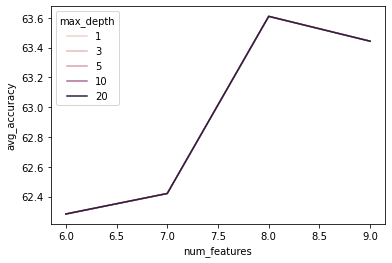

In [59]:
df_avg_accuracies_per_feature = pd.DataFrame(avg_accuracies_per_feature)

sns.lineplot(data=df_avg_accuracies_per_feature, x="num_features", y="avg_accuracy", hue='max_depth')

### Random Forest

In [57]:
# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev)

# Remove id column
dev1.drop("id",axis=1, inplace=True)

# Change decision column to str
dev1["Decision"] = dev1["Decision"].astype('str')

# Split into test and train sets
test_1, train_1 = train_test_split(dev1, test_size=0.10, random_state=22)

# Test Random Forest for different num_trees values
accuracies = []
num_trees_list = [5,25,50,100,200,400,800]
for num_trees in num_trees_list:
    print(f"num_trees:{num_trees}")
    # Run Random Forest algorithm to create model
    print("----- Training Random Forest -----")
    rf_config = {'enableRandomForest': True, 'num_of_trees': num_trees, 'enableParallelism': True}
    rf_model = chef.fit(train_1, config = rf_config)
    print("----- ------------ -----")

    # Test Random Forest algorithm
    print("----- Testing Random Forest -----")
    rf_eval = evaluate_mod(rf_model, test_1, task="test")
    accuracies.append({num_trees: rf_eval['accuracy']})
    print("----- ----------- -----")
    
    for i in range(num_trees):
        # Move output model so it doesn't get overwritten
        save_dir = f"outputs/rules/RF/numtrees_{num_trees}"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        for ftype in ['py','json']: 
            shutil.move(f"outputs/rules/rule_{i}.{ftype}", save_dir+f"/rule_{i}.{ftype}") 

pp.pprint(accuracies)

num_trees:5
----- Training Random Forest -----
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.95s/it]


-------------------------
finished in  9.835283994674683  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  73.01275760549558 % on  1019  instances
Labels:  ['True' 'False']
Confusion matrix:  [[499, 190], [85, 245]]
Precision:  72.4238 %, Recall:  85.4452 %, F1:  78.3975 %
----- ------------ -----
----- Testing Random Forest -----
----- ----------- -----
num_trees:25
----- Training Random Forest -----
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  2.92it/s]


-------------------------
finished in  8.727134227752686  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.92836113837095 % on  1019  instances
Labels:  ['True' 'False']
Confusion matrix:  [[474, 227], [110, 208]]
Precision:  67.6177 %, Recall:  81.1644 %, F1:  73.7743 %
----- ------------ -----
----- Testing Random Forest -----
----- ----------- -----
num_trees:50
----- Training Random Forest -----
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  6.05it/s]


-------------------------
finished in  8.480001211166382  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.6712463199215 % on  1019  instances
Labels:  ['True' 'False']
Confusion matrix:  [[459, 235], [125, 200]]
Precision:  66.1383 %, Recall:  78.5959 %, F1:  71.831 %
----- ------------ -----
----- Testing Random Forest -----
----- ----------- -----
num_trees:100
----- Training Random Forest -----
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.93it/s]


-------------------------
finished in  8.066715240478516  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.96565260058881 % on  1019  instances
Labels:  ['True' 'False']
Confusion matrix:  [[492, 265], [92, 170]]
Precision:  64.9934 %, Recall:  84.2466 %, F1:  73.3781 %
----- ------------ -----
----- Testing Random Forest -----
----- ----------- -----
num_trees:200
----- Training Random Forest -----
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 26.76it/s]


-------------------------
finished in  8.210349082946777  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  61.23650637880275 % on  1019  instances
Labels:  ['True' 'False']
Confusion matrix:  [[567, 378], [17, 57]]
Precision:  60.0 %, Recall:  97.089 %, F1:  74.1661 %
----- ------------ -----
----- Testing Random Forest -----
----- ----------- -----
num_trees:400
----- Training Random Forest -----
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:11<00:00, 33.49it/s]


-------------------------
finished in  13.017484903335571  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  58.783120706575076 % on  1019  instances
Labels:  ['True' 'False']
Confusion matrix:  [[542, 378], [42, 57]]
Precision:  58.913 %, Recall:  92.8082 %, F1:  72.0744 %
----- ------------ -----
----- Testing Random Forest -----
----- ----------- -----
num_trees:800
----- Training Random Forest -----
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:11<00:00, 68.26it/s]


-------------------------
finished in  13.703150749206543  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  57.31108930323847 % on  1019  instances
Labels:  ['True' 'False']
Confusion matrix:  [[584, 435], [0, 0]]
Precision:  57.3111 %, Recall:  100.0 %, F1:  72.8634 %
----- ------------ -----
----- Testing Random Forest -----
----- ----------- -----
[   {5: 60.785597381342065},
    {25: 62.97872340425532},
    {50: 62.291325695581016},
    {100: 63.186033824331695},
    {200: 59.72722313147845},
    {400: 58.83251500272777},
    {800: 56.95581014729951}]


In [20]:
### Random Forest With Top n Features Only
rf_avg_accuracies_per_feature = []
for num_features in range(2,tfdf_features.count()['feature']):    

    # Save Top n Features to Array
    top_n_features = tfdf_features.sort_values(by=['avg_diff']).tail(num_features)['feature'].unique()
    print(f"top_n_features: ({len(top_n_features)}) {top_n_features}")

    dev1 = dev.copy()

    # Remove all but top n features with regards to T/F diff averages
    dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]     

    # Change decision column to str
    dev1["Decision"] = dev1["Decision"].astype('str')
    
    # Map object features to ints
    dev1, dtypedict = map_object_columns_to_int(dev1)

    # Split into test and train sets
    test_1, train_1 = train_test_split(dev1, test_size=0.10, random_state=1)

    # Test Random Forest for different num_trees values
    accuracies = []
    num_trees_list = [8,12,20,30,45]
    for num_trees in num_trees_list:
        print(f"\nnum_trees:{num_trees}")
        # Run Random Forest algorithm to create model
#         print("----- Training Random Forest -----")
        rf_config = {'enableRandomForest': True, 'num_of_trees': num_trees, 'enableParallelism': True}
        rf_model = chef.fit(train_1, config = rf_config)
#         print("----- ------------ -----")

        # Test Random Forest algorithm
#         print("----- Testing Random Forest -----")
        rf_eval = evaluate_mod(rf_model, test_1, task="test")
        rf_avg_accuracies_per_feature.append({
            "num_features": num_features,
            "num_trees": num_trees,
            "avg_accuracy": rf_eval['accuracy']
        })
#         accuracies.append({num_trees: rf_eval['accuracy']})
#         print("----- ----------- -----")

        for i in range(num_trees):
            # Move output model so it doesn't get overwritten
            save_dir = f"outputs/rules/RF/{num_features}_features/numtrees_{num_trees}"
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            for ftype in ['py','json']: 
                shutil.move(f"outputs/rules/rule_{i}.{ftype}", save_dir+f"/rule_{i}.{ftype}") 

#     pp.pprint(accuracies)

top_n_features: (2) ['Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.01it/s]


-------------------------
finished in  1.727409839630127  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  59.666339548577035 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[242, 202], [209, 366]]
Precision:  54.5045 %, Recall:  53.6585 %, F1:  54.0782 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 10.87it/s]


-------------------------
finished in  1.2203760147094727  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  60.45142296368989 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[99, 51], [352, 517]]
Precision:  66.0 %, Recall:  21.9512 %, F1:  32.9451 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.93it/s]


-------------------------
finished in  1.473435878753662  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  60.549558390579 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[132, 83], [319, 485]]
Precision:  61.3953 %, Recall:  29.2683 %, F1:  39.6396 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 16.79it/s]


-------------------------
finished in  1.93743896484375  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  60.05888125613347 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[103, 59], [348, 509]]
Precision:  63.5802 %, Recall:  22.8381 %, F1:  33.6052 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:02<00:00, 21.25it/s]


-------------------------
finished in  2.310084819793701  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  61.43277723258096 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[147, 89], [304, 479]]
Precision:  62.2881 %, Recall:  32.5942 %, F1:  42.7947 %
top_n_features: (3) ['Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.06it/s]


-------------------------
finished in  1.6807479858398438  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  60.45142296368989 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[197, 149], [254, 419]]
Precision:  56.9364 %, Recall:  43.6807 %, F1:  49.4354 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.67it/s]


-------------------------
finished in  1.9266009330749512  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.00294406280668 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[168, 94], [283, 474]]
Precision:  64.1221 %, Recall:  37.2506 %, F1:  47.1249 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.69it/s]


-------------------------
finished in  2.4366281032562256  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  61.33464180569185 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[196, 139], [255, 429]]
Precision:  58.5075 %, Recall:  43.459 %, F1:  49.8728 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.72it/s]


-------------------------
finished in  3.27186918258667  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  61.82531894013739 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[134, 72], [317, 496]]
Precision:  65.0485 %, Recall:  29.7118 %, F1:  40.7915 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 12.44it/s]


-------------------------
finished in  3.8072900772094727  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  57.89990186457311 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[87, 65], [364, 503]]
Precision:  57.2368 %, Recall:  19.2905 %, F1:  28.8558 %
top_n_features: (4) ['Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.71it/s]


-------------------------
finished in  2.276794910430908  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  60.05888125613347 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[262, 218], [189, 350]]
Precision:  54.5833 %, Recall:  58.0931 %, F1:  56.2835 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.65it/s]


-------------------------
finished in  2.6922011375427246  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.21786064769382 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[252, 186], [199, 382]]
Precision:  57.5342 %, Recall:  55.8758 %, F1:  56.6929 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.58it/s]


-------------------------
finished in  3.7142081260681152  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  61.923454367026494 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[154, 91], [297, 477]]
Precision:  62.8571 %, Recall:  34.1463 %, F1:  44.2528 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.68it/s]


-------------------------
finished in  4.211573123931885  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.59175662414132 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[223, 143], [228, 425]]
Precision:  60.929 %, Recall:  49.4457 %, F1:  54.59 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:04<00:00, 10.37it/s]


-------------------------
finished in  4.525724172592163  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.70853778213935 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[177, 106], [274, 462]]
Precision:  62.5442 %, Recall:  39.2461 %, F1:  48.2289 %
top_n_features: (5) ['Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.96it/s]


-------------------------
finished in  2.801572799682617  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.610402355250244 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[263, 193], [188, 375]]
Precision:  57.6754 %, Recall:  58.3149 %, F1:  57.9934 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.14it/s]


-------------------------
finished in  3.9508049488067627  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.90480863591757 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[204, 131], [247, 437]]
Precision:  60.8955 %, Recall:  45.2328 %, F1:  51.9084 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.48it/s]


-------------------------
finished in  3.7824456691741943  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.31599607458293 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[181, 114], [270, 454]]
Precision:  61.3559 %, Recall:  40.133 %, F1:  48.5254 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.62it/s]


-------------------------
finished in  5.529703855514526  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.27870461236506 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[262, 175], [189, 393]]
Precision:  59.9542 %, Recall:  58.0931 %, F1:  59.009 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  7.03it/s]


-------------------------
finished in  6.665884256362915  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.886162904808636 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[184, 101], [267, 467]]
Precision:  64.5614 %, Recall:  40.7982 %, F1:  50.0 %
top_n_features: (6) ['Passanger' 'Restaurant20to50' 'Distance' 'Occupation' 'Education'
 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.08it/s]


-------------------------
finished in  3.9798998832702637  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.27870461236506 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[264, 177], [187, 391]]
Precision:  59.8639 %, Recall:  58.5366 %, F1:  59.1928 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.53it/s]


-------------------------
finished in  4.881602048873901  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.59175662414132 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[258, 178], [193, 390]]
Precision:  59.1743 %, Recall:  57.2062 %, F1:  58.1736 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.66it/s]


-------------------------
finished in  5.605717182159424  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.26005888125613 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[289, 192], [162, 376]]
Precision:  60.0832 %, Recall:  64.0798 %, F1:  62.0172 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.76it/s]


-------------------------
finished in  6.507374048233032  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  61.62904808635918 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[201, 141], [250, 427]]
Precision:  58.7719 %, Recall:  44.5676 %, F1:  50.6935 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:07<00:00,  5.97it/s]


-------------------------
finished in  7.7734551429748535  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.90480863591757 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[183, 110], [268, 458]]
Precision:  62.4573 %, Recall:  40.5765 %, F1:  49.1935 %
top_n_features: (7) ['Direction_same' 'Passanger' 'Restaurant20to50' 'Distance' 'Occupation'
 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.37it/s]


-------------------------
finished in  5.942438840866089  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.16192345436703 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[279, 183], [172, 385]]
Precision:  60.3896 %, Recall:  61.8625 %, F1:  61.1172 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.07it/s]


-------------------------
finished in  5.920971870422363  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.78802747791953 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[245, 163], [206, 405]]
Precision:  60.049 %, Recall:  54.3237 %, F1:  57.0431 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.31it/s]


-------------------------
finished in  6.217180013656616  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.35819430814524 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[266, 168], [185, 400]]
Precision:  61.2903 %, Recall:  58.98 %, F1:  60.113 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.82it/s]


-------------------------
finished in  6.398437976837158  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.10107948969578 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[257, 182], [194, 386]]
Precision:  58.5421 %, Recall:  56.9845 %, F1:  57.7528 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  6.57it/s]


-------------------------
finished in  7.047562837600708  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.297350343473994 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[153, 76], [298, 492]]
Precision:  66.8122 %, Recall:  33.9246 %, F1:  45.0 %
top_n_features: (8) ['Bar' 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance'
 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.45it/s]


-------------------------
finished in  5.668245077133179  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.1432777232581 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[245, 139], [206, 429]]
Precision:  63.8021 %, Recall:  54.3237 %, F1:  58.6826 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.74it/s]


-------------------------
finished in  7.032511234283447  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.00294406280668 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[277, 203], [174, 365]]
Precision:  57.7083 %, Recall:  61.4191 %, F1:  59.5059 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.39it/s]


-------------------------
finished in  8.546528816223145  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.6153091265947 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[295, 174], [156, 394]]
Precision:  62.8998 %, Recall:  65.4102 %, F1:  64.1304 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.64it/s]


-------------------------
finished in  6.6258909702301025  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.57311089303238 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[220, 130], [231, 438]]
Precision:  62.8571 %, Recall:  48.7805 %, F1:  54.9313 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  6.93it/s]


-------------------------
finished in  6.6944260597229  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.70853778213935 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[188, 117], [263, 451]]
Precision:  61.6393 %, Recall:  41.6851 %, F1:  49.7354 %
top_n_features: (9) ['Time' 'Bar' 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance'
 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.30it/s]


-------------------------
finished in  6.2438929080963135  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.63395485770363 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[284, 173], [167, 395]]
Precision:  62.1444 %, Recall:  62.9712 %, F1:  62.5551 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.74it/s]


-------------------------
finished in  7.024274826049805  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.00785083415113 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[269, 144], [182, 424]]
Precision:  65.1332 %, Recall:  59.6452 %, F1:  62.2685 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.05it/s]


-------------------------
finished in  6.682674169540405  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.33954857703631 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[282, 174], [169, 394]]
Precision:  61.8421 %, Recall:  62.5277 %, F1:  62.183 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  4.26it/s]


-------------------------
finished in  7.215465307235718  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.43768400392541 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[217, 108], [234, 460]]
Precision:  66.7692 %, Recall:  48.1153 %, F1:  55.9278 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  6.47it/s]


-------------------------
finished in  7.14950704574585  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.08243375858684 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[214, 129], [237, 439]]
Precision:  62.3907 %, Recall:  47.4501 %, F1:  53.9043 %
top_n_features: (10) ['Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.23it/s]


-------------------------
finished in  6.601847887039185  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.22276741903828 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[277, 160], [174, 408]]
Precision:  63.3867 %, Recall:  61.4191 %, F1:  62.3874 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.60it/s]


-------------------------
finished in  7.614193916320801  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.94700686947988 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[311, 207], [140, 361]]
Precision:  60.0386 %, Recall:  68.9579 %, F1:  64.1899 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.87it/s]


-------------------------
finished in  7.108258962631226  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.7693817468106 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[234, 142], [217, 426]]
Precision:  62.234 %, Recall:  51.8847 %, F1:  56.5901 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.51it/s]


-------------------------
finished in  6.812373876571655  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.40039254170756 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[281, 152], [170, 416]]
Precision:  64.8961 %, Recall:  62.306 %, F1:  63.5747 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  6.70it/s]


-------------------------
finished in  6.909534931182861  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.47497546614328 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[205, 116], [246, 452]]
Precision:  63.8629 %, Recall:  45.4545 %, F1:  53.1088 %
top_n_features: (11) ['Age' 'Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


-------------------------
finished in  7.137414932250977  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  70.75564278704613 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[312, 159], [139, 409]]
Precision:  66.242 %, Recall:  69.1796 %, F1:  67.6789 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.42it/s]


-------------------------
finished in  8.596167802810669  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.81157998037291 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[323, 200], [128, 368]]
Precision:  61.7591 %, Recall:  71.6186 %, F1:  66.3244 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.63it/s]


-------------------------
finished in  7.719335079193115  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.20412168792934 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[267, 140], [184, 428]]
Precision:  65.602 %, Recall:  59.2018 %, F1:  62.2378 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  4.23it/s]


-------------------------
finished in  7.244521141052246  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.06378802747793 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[219, 124], [232, 444]]
Precision:  63.8484 %, Recall:  48.5588 %, F1:  55.1638 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:07<00:00,  6.23it/s]


-------------------------
finished in  7.432857990264893  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.49362119725221 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[234, 155], [217, 413]]
Precision:  60.1542 %, Recall:  51.8847 %, F1:  55.7143 %
top_n_features: (12) ['Gender' 'Age' 'Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.06it/s]


-------------------------
finished in  7.647705793380737  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  69.18547595682041 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[335, 198], [116, 370]]
Precision:  62.8518 %, Recall:  74.2794 %, F1:  68.0894 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.47it/s]


-------------------------
finished in  8.291905879974365  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.045142296369 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[290, 185], [161, 383]]
Precision:  61.0526 %, Recall:  64.3016 %, F1:  62.635 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.55it/s]


-------------------------
finished in  7.983582973480225  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.94700686947988 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[283, 179], [168, 389]]
Precision:  61.2554 %, Recall:  62.7494 %, F1:  61.9934 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.62it/s]


-------------------------
finished in  6.648142099380493  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.57311089303238 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[213, 123], [238, 445]]
Precision:  63.3929 %, Recall:  47.2284 %, F1:  54.1296 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  6.64it/s]


-------------------------
finished in  6.969495058059692  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.414131501472035 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[173, 105], [278, 463]]
Precision:  62.2302 %, Recall:  38.3592 %, F1:  47.4623 %
top_n_features: (13) ['Children' 'Gender' 'Age' 'Coffeehouse' 'Time' 'Bar' 'Direction_same'
 'Passanger' 'Restaurant20to50' 'Distance' 'Occupation' 'Education'
 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.05it/s]


-------------------------
finished in  7.7631518840789795  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.02649656526006 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[323, 208], [128, 360]]
Precision:  60.8286 %, Recall:  71.6186 %, F1:  65.7841 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.37it/s]


-------------------------
finished in  8.908531904220581  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.02649656526006 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[273, 158], [178, 410]]
Precision:  63.3411 %, Recall:  60.5322 %, F1:  61.9048 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.76it/s]


-------------------------
finished in  7.363224029541016  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.30225711481845 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[277, 149], [174, 419]]
Precision:  65.0235 %, Recall:  61.4191 %, F1:  63.1699 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  4.17it/s]


-------------------------
finished in  7.355742931365967  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.47497546614328 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[293, 204], [158, 364]]
Precision:  58.9537 %, Recall:  64.9667 %, F1:  61.8143 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:07<00:00,  5.79it/s]


-------------------------
finished in  7.9669318199157715  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.37684003925418 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[224, 136], [227, 432]]
Precision:  62.2222 %, Recall:  49.6674 %, F1:  55.2404 %
top_n_features: (14) ['Income' 'Children' 'Gender' 'Age' 'Coffeehouse' 'Time' 'Bar'
 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance' 'Occupation'
 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.03it/s]


-------------------------
finished in  7.85640811920166  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  69.77428851815506 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[331, 188], [120, 380]]
Precision:  63.7765 %, Recall:  73.3925 %, F1:  68.2474 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.30it/s]


-------------------------
finished in  9.367842674255371  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.5171736997056 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[310, 190], [141, 378]]
Precision:  62.0 %, Recall:  68.7361 %, F1:  65.1945 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.18it/s]


-------------------------
finished in  9.325625896453857  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.30225711481845 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[289, 161], [162, 407]]
Precision:  64.2222 %, Recall:  64.0798 %, F1:  64.1509 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.58it/s]


-------------------------
finished in  8.535302877426147  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.886162904808636 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[247, 164], [204, 404]]
Precision:  60.0973 %, Recall:  54.7672 %, F1:  57.3086 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:08<00:00,  5.58it/s]


-------------------------
finished in  8.25807809829712  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.45632973503434 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[176, 77], [275, 491]]
Precision:  69.5652 %, Recall:  39.0244 %, F1:  50.0 %
top_n_features: (15) ['Coupon_validity' 'Income' 'Children' 'Gender' 'Age' 'Coffeehouse' 'Time'
 'Bar' 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance'
 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.00s/it]


-------------------------
finished in  8.16321611404419  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  69.38174681059863 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[345, 206], [106, 362]]
Precision:  62.6134 %, Recall:  76.4967 %, F1:  68.8623 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.28it/s]


-------------------------
finished in  9.484039783477783  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.12463199214916 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[316, 200], [135, 368]]
Precision:  61.2403 %, Recall:  70.0665 %, F1:  65.3568 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.30it/s]


-------------------------
finished in  8.84387993812561  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.6153091265947 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[328, 207], [123, 361]]
Precision:  61.3084 %, Recall:  72.7273 %, F1:  66.5314 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  3.86it/s]


-------------------------
finished in  7.939605951309204  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.71344455348381 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[229, 107], [222, 461]]
Precision:  68.1548 %, Recall:  50.7761 %, F1:  58.1957 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:07<00:00,  5.67it/s]


-------------------------
finished in  8.133677005767822  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.297350343473994 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[205, 128], [246, 440]]
Precision:  61.5616 %, Recall:  45.4545 %, F1:  52.2959 %
top_n_features: (16) ['Weather' 'Coupon_validity' 'Income' 'Children' 'Gender' 'Age'
 'Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.03s/it]


-------------------------
finished in  8.390268802642822  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  70.85377821393523 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[332, 178], [119, 390]]
Precision:  65.098 %, Recall:  73.6142 %, F1:  69.0947 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.24it/s]


-------------------------
finished in  9.84905481338501  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.32090284592738 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[293, 175], [158, 393]]
Precision:  62.6068 %, Recall:  64.9667 %, F1:  63.7649 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.21it/s]


-------------------------
finished in  9.158655166625977  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.20412168792934 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[297, 170], [154, 398]]
Precision:  63.5974 %, Recall:  65.8537 %, F1:  64.7059 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  3.80it/s]


-------------------------
finished in  8.054819107055664  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.43768400392541 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[300, 191], [151, 377]]
Precision:  61.0998 %, Recall:  66.5188 %, F1:  63.6942 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:08<00:00,  5.53it/s]


-------------------------
finished in  8.337280988693237  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.886162904808636 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[182, 99], [269, 469]]
Precision:  64.7687 %, Recall:  40.3548 %, F1:  49.7268 %
top_n_features: (17) ['Maritalstatus' 'Weather' 'Coupon_validity' 'Income' 'Children' 'Gender'
 'Age' 'Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.09s/it]


-------------------------
finished in  8.837380170822144  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  69.67615309126595 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[313, 171], [138, 397]]
Precision:  64.6694 %, Recall:  69.4013 %, F1:  66.9518 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:10<00:00,  1.14it/s]


-------------------------
finished in  10.612400770187378  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.84887144259078 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[333, 230], [118, 338]]
Precision:  59.1474 %, Recall:  73.8359 %, F1:  65.6805 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.98it/s]


-------------------------
finished in  10.2533540725708  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.20412168792934 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[270, 143], [181, 425]]
Precision:  65.3753 %, Recall:  59.867 %, F1:  62.5 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.24it/s]


-------------------------
finished in  9.408098936080933  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.12463199214916 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[280, 164], [171, 404]]
Precision:  63.0631 %, Recall:  62.0843 %, F1:  62.5699 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:10<00:00,  4.46it/s]


-------------------------
finished in  10.294781923294067  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  62.31599607458293 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[174, 107], [277, 461]]
Precision:  61.9217 %, Recall:  38.5809 %, F1:  47.541 %
top_n_features: (18) ['Restaurantlessthan20' 'Maritalstatus' 'Weather' 'Coupon_validity'
 'Income' 'Children' 'Gender' 'Age' 'Coffeehouse' 'Time' 'Bar'
 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance' 'Occupation'
 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.11s/it]


-------------------------
finished in  8.981618165969849  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  69.47988223748773 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[345, 205], [106, 363]]
Precision:  62.7273 %, Recall:  76.4967 %, F1:  68.9311 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:10<00:00,  1.17it/s]


-------------------------
finished in  10.35366177558899  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  69.97055937193326 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[298, 153], [153, 415]]
Precision:  66.0754 %, Recall:  66.0754 %, F1:  66.0754 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.90it/s]


-------------------------
finished in  10.637974977493286  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.79293424926398 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[254, 121], [197, 447]]
Precision:  67.7333 %, Recall:  56.3193 %, F1:  61.5012 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.29it/s]


-------------------------
finished in  9.277420997619629  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.53581943081453 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[249, 139], [202, 429]]
Precision:  64.1753 %, Recall:  55.2106 %, F1:  59.3564 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:08<00:00,  5.07it/s]


-------------------------
finished in  9.074145078659058  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  66.63395485770363 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[283, 172], [168, 396]]
Precision:  62.1978 %, Recall:  62.7494 %, F1:  62.4724 %
top_n_features: (19) ['Temperature' 'Restaurantlessthan20' 'Maritalstatus' 'Weather'
 'Coupon_validity' 'Income' 'Children' 'Gender' 'Age' 'Coffeehouse' 'Time'
 'Bar' 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance'
 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:09<00:00,  1.15s/it]


-------------------------
finished in  9.345136165618896  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  71.24631992149166 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[324, 166], [127, 402]]
Precision:  66.1224 %, Recall:  71.8404 %, F1:  68.8629 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:10<00:00,  1.19it/s]


-------------------------
finished in  10.232375860214233  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  69.77428851815506 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[345, 202], [106, 366]]
Precision:  63.0713 %, Recall:  76.4967 %, F1:  69.1383 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.18it/s]


-------------------------
finished in  9.305408000946045  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.81157998037291 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[284, 161], [167, 407]]
Precision:  63.8202 %, Recall:  62.9712 %, F1:  63.3929 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.32it/s]


-------------------------
finished in  9.193335771560669  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.96565260058881 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[296, 202], [155, 366]]
Precision:  59.4378 %, Recall:  65.6319 %, F1:  62.3815 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:11<00:00,  3.89it/s]


-------------------------
finished in  11.822852849960327  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  65.65260058881256 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[262, 161], [189, 407]]
Precision:  61.9385 %, Recall:  58.0931 %, F1:  59.9542 %
top_n_features: (20) ['Driving_to' 'Temperature' 'Restaurantlessthan20' 'Maritalstatus'
 'Weather' 'Coupon_validity' 'Income' 'Children' 'Gender' 'Age'
 'Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']

num_trees:8
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:12<00:00,  1.57s/it]


-------------------------
finished in  12.741836786270142  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  72.22767419038273 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[338, 170], [113, 398]]
Precision:  66.5354 %, Recall:  74.9446 %, F1:  70.4901 %

num_trees:12
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:12<00:00,  1.06s/it]


-------------------------
finished in  12.915957689285278  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  68.10598626104023 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[295, 169], [156, 399]]
Precision:  63.5776 %, Recall:  65.4102 %, F1:  64.4809 %

num_trees:20
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.80it/s]


-------------------------
finished in  11.253105878829956  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  67.6153091265947 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[269, 148], [182, 420]]
Precision:  64.5084 %, Recall:  59.6452 %, F1:  61.9816 %

num_trees:30
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.26it/s]


-------------------------
finished in  9.370825052261353  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  64.7693817468106 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[254, 162], [197, 406]]
Precision:  61.0577 %, Recall:  56.3193 %, F1:  58.5929 %

num_trees:45
[INFO]:  8 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:08<00:00,  5.08it/s]


-------------------------
finished in  9.051231861114502  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  63.886162904808636 % on  1019  instances
Labels:  ['False' 'True']
Confusion matrix:  [[198, 115], [253, 453]]
Precision:  63.2588 %, Recall:  43.9024 %, F1:  51.8324 %


<AxesSubplot:xlabel='num_features', ylabel='avg_accuracy'>

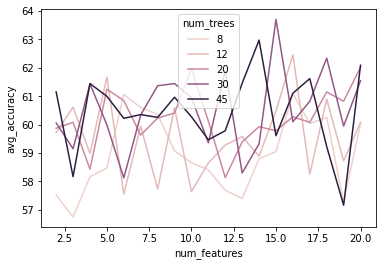

In [21]:
df_rf_avg_accuracies_per_feature = pd.DataFrame(rf_avg_accuracies_per_feature)

sns.lineplot(data=df_rf_avg_accuracies_per_feature, x="num_features", y="avg_accuracy", hue='num_trees')

### Feature Importance



### Single Model Feature Importance
rules:  ['outputs/rules/RF/numtrees_5/rule_0.py', 'outputs/rules/RF/numtrees_5/rule_1.py', 'outputs/rules/RF/numtrees_5/rule_2.py', 'outputs/rules/RF/numtrees_5/rule_3.py', 'outputs/rules/RF/numtrees_5/rule_4.py']
Decision rule:  outputs/rules/RF/numtrees_5/rule_0.py
Decision rule:  outputs/rules/RF/numtrees_5/rule_1.py
Decision rule:  outputs/rules/RF/numtrees_5/rule_2.py
Decision rule:  outputs/rules/RF/numtrees_5/rule_3.py
Decision rule:  outputs/rules/RF/numtrees_5/rule_4.py
rules:  ['outputs/rules/RF/numtrees_6/rule_0.py', 'outputs/rules/RF/numtrees_6/rule_1.py', 'outputs/rules/RF/numtrees_6/rule_2.py', 'outputs/rules/RF/numtrees_6/rule_3.py', 'outputs/rules/RF/numtrees_6/rule_4.py', 'outputs/rules/RF/numtrees_6/rule_5.py']
Decision rule:  outputs/rules/RF/numtrees_6/rule_0.py
Decision rule:  outputs/rules/RF/numtrees_6/rule_1.py
Decision rule:  outputs/rules/RF/numtrees_6/rule_2.py
Decision rule:  outputs/rules/RF/numtrees_6/rule_3.py
Decisio

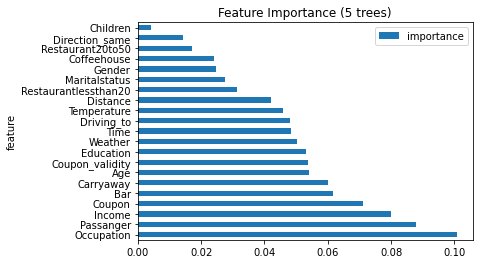

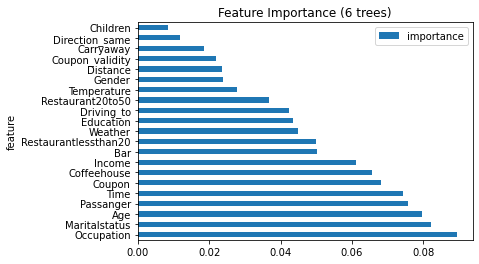

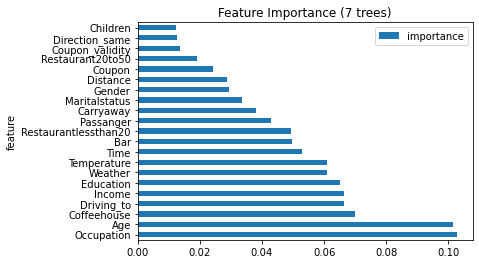

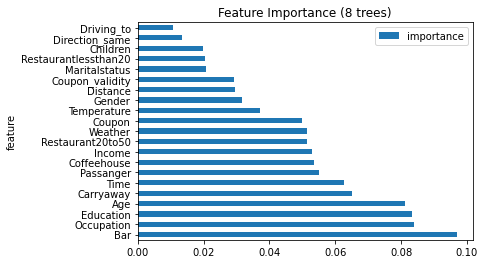

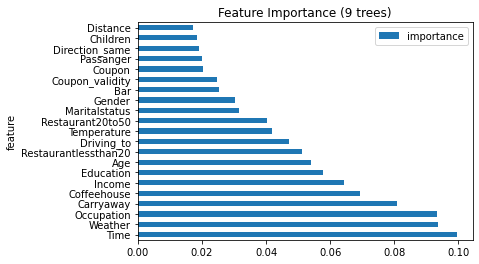

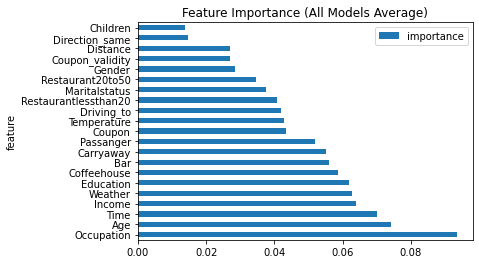

In [39]:
print("\n\n### Single Model Feature Importance")
for num_trees in num_trees_list:
    # Make list of rule files
    decision_rules = []
    for i in range(num_trees):
        decision_rules.append(f"outputs/rules/RF/numtrees_{num_trees}/rule_{i}.py")

    # Plot feature importance
    fi = chef.feature_importance(decision_rules).set_index("feature")
    fi.plot(kind="barh", title=f"Feature Importance ({num_trees} trees)");

print("\n\n### Combined Feature Importance")
# Make list of rule files
decision_rules = []
for num_trees in num_trees_list:
    for i in range(num_trees):
        decision_rules.append(f"outputs/rules/RF/numtrees_{num_trees}/rule_{i}.py")

# Plot feature importance
fi = chef.feature_importance(decision_rules).set_index("feature")
fi.plot(kind="barh", title=f"Feature Importance (All Models Average)");

### AdaBoost

Training score mean: 0.6810692853246044
prediction_accuracy 0.6800785083415113


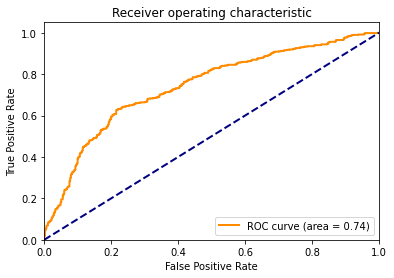

In [140]:
dev1 = dev.copy()

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=1)

# Create classifier
clf = AdaBoostClassifier(n_estimators=50)

# Train classifier & report score with cross-validation
train_scores = cross_val_score(clf, train_1.drop("Decision",axis=1), train_1["Decision"], cv=5)
clf.fit(train_1.drop("Decision",axis=1), train_1["Decision"])
print(f"Training score mean: {train_scores.mean()}")

# Test classifier & report score
predicted_values = clf.predict(test_1.drop("Decision",axis=1))
prediction_accuracy = clf.score(test_1.drop("Decision",axis=1), test_1["Decision"])
print("prediction_accuracy", prediction_accuracy)
predicted_probabilities = clf.decision_function(test_1.drop("Decision",axis=1))

compute_and_plot_roc_curve(test_1["Decision"],predicted_probabilities)


train score


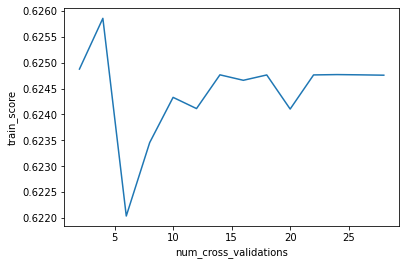

test score


<AxesSubplot:xlabel='num_cross_validations', ylabel='test_score'>

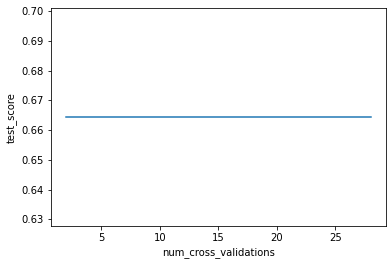

In [141]:
# Adaboost with Different Numbers of Cross Validations
dev1 = dev.copy()

ab_avg_accuracies_per_feature = []

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=22)

for cv in range(2,30,2):
    clf = AdaBoostClassifier(n_estimators=n_estimators)
    train_scores = cross_val_score(clf, train_1[top_n_features], train_1["Decision"], cv=cv)
    clf.fit(train_1.drop("Decision",axis=1), train_1["Decision"])
    prediction_accuracy = clf.score(test_1.drop("Decision",axis=1), test_1["Decision"])
    ab_avg_accuracies_per_feature.append({
        "num_cross_validations": cv,
        "train_score": train_scores.mean(),
        "test_score": prediction_accuracy
    })
    
df_ab_avg_accuracies_per_feature = pd.DataFrame(ab_avg_accuracies_per_feature)

print("train score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_cross_validations", y="train_score")
plt.show()
print("test score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_cross_validations", y="test_score")

From this chart, it seems that the number of cross validations does not matter.

top_n_features: (2) ['Education' 'Coupon']
top_n_features: (3) ['Occupation' 'Education' 'Coupon']
top_n_features: (4) ['Distance' 'Occupation' 'Education' 'Coupon']
top_n_features: (5) ['Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']
top_n_features: (6) ['Passanger' 'Restaurant20to50' 'Distance' 'Occupation' 'Education'
 'Coupon']
top_n_features: (7) ['Direction_same' 'Passanger' 'Restaurant20to50' 'Distance' 'Occupation'
 'Education' 'Coupon']
top_n_features: (8) ['Bar' 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance'
 'Occupation' 'Education' 'Coupon']
top_n_features: (9) ['Time' 'Bar' 'Direction_same' 'Passanger' 'Restaurant20to50' 'Distance'
 'Occupation' 'Education' 'Coupon']
top_n_features: (10) ['Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education' 'Coupon']
top_n_features: (11) ['Age' 'Coffeehouse' 'Time' 'Bar' 'Direction_same' 'Passanger'
 'Restaurant20to50' 'Distance' 'Occupation' 'Education

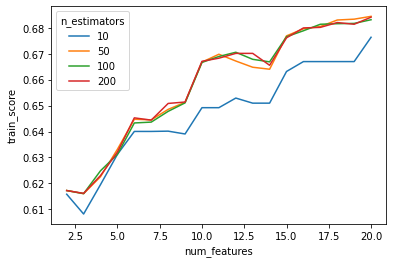

Testing Score


<AxesSubplot:xlabel='num_features', ylabel='test_score'>

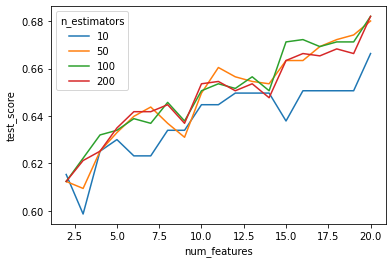

In [143]:
# Adaboost with Different Number of Features

ab_avg_accuracies_per_feature = []
for num_features in range(2,tfdf_features.count()['feature']):
    
    # Save Top n Features to Array
    top_n_features = tfdf_features.sort_values(by=['avg_diff']).tail(num_features)['feature'].unique()
    print(f"top_n_features: ({len(top_n_features)}) {top_n_features}")
    
    # Make copy of df
    dev1 = dev.copy()

    # Remove all but top n features with regards to T/F diff averages
    dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]    

    # Map object features to ints
    dev1, dtypedict = map_object_columns_to_int(dev1)

    # Map float features to ints
    dev1, dtypedict = map_float_columns_to_int(dev1)

    # Split into test and train sets
    train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=22)
    for n_estimators in [10,50,100,200]:
        clf = AdaBoostClassifier(n_estimators=n_estimators)
        train_scores = cross_val_score(clf, train_1[top_n_features], train_1["Decision"], cv=5)
        clf.fit(train_1.drop("Decision",axis=1), train_1["Decision"])
        prediction_accuracy = clf.score(test_1.drop("Decision",axis=1), test_1["Decision"])
        ab_avg_accuracies_per_feature.append({
            "num_features": num_features,
            "n_estimators": n_estimators,
            "train_score": train_scores.mean(),
            "test_score": prediction_accuracy
        })
df_ab_avg_accuracies_per_feature = pd.DataFrame(ab_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="train_score", hue='n_estimators', palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="test_score", hue='n_estimators', palette="tab10")

From the above results, it seems that 100 or estimators is the sweet spot, as both the training and testing scores are lower for values less than 100, and for values greater there isn't much difference. Additionally, the test score seems to increase with the number of features, so we will use all the features. Next task: create a final model to run the actual test data on.

Training score mean: 0.6881614839061647
prediction_accuracy 0.6594700686947988


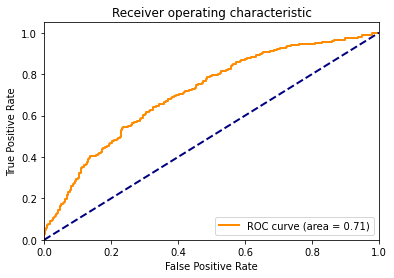

<AxesSubplot:xlabel='feature_importance', ylabel='feature'>

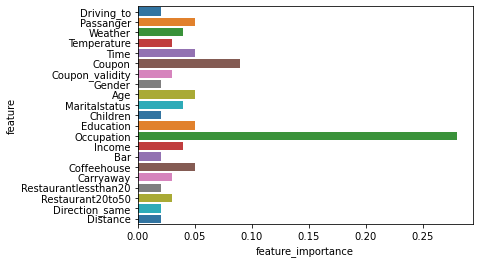

In [133]:
### Create Adaboost model with all features and num_estimators=100

# Make copy of df
dev1 = dev.copy()

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10) #, random_state=1)

# Create classifier
clf = AdaBoostClassifier(n_estimators=100)

# Train classifier & report score with cross-validation
train_scores = cross_val_score(clf, train_1.drop(["Decision","id"],axis=1), train_1["Decision"], cv=5)
clf.fit(train_1.drop(["Decision","id"],axis=1), train_1["Decision"])
print(f"Training score mean: {train_scores.mean()}")

# Test classifier & report score
predicted_values = clf.predict(test_1.drop(["Decision","id"],axis=1))
prediction_accuracy = clf.score(test_1.drop(["Decision","id"],axis=1), test_1["Decision"])
print("prediction_accuracy", prediction_accuracy)
predicted_probabilities = clf.decision_function(test_1.drop(["Decision","id"],axis=1))

compute_and_plot_roc_curve(test_1["Decision"],predicted_probabilities)

# Save model
save_dir = "outputs/rules/Adaboost/final/1"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
dump(clf, f'{save_dir}/model.joblib') 

# Print feature importance
fs = test_1.drop(["Decision","id"],axis=1).columns.values.tolist()
fidata = [{'feature': f, 'feature_importance': i} for (f,i) in zip(fs, clf.feature_importances_)]
df_fidata = pd.DataFrame(fidata)

sns.barplot(data=df_fidata, x='feature_importance', y='feature' , palette="tab10" )


Adaboost/final/1 got .659 accuracy. Let's see if we can do better.

num_features: 2
num_features: 3
num_features: 4
num_features: 5
num_features: 6
num_features: 7
num_features: 8
num_features: 9
num_features: 10
num_features: 11
num_features: 12
num_features: 13
num_features: 14
num_features: 15
num_features: 16
num_features: 17
num_features: 18
num_features: 19
num_features: 20
Training Score


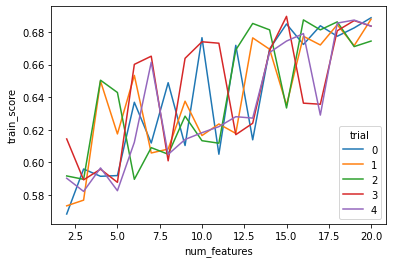

Testing Score


<AxesSubplot:xlabel='num_features', ylabel='test_score'>

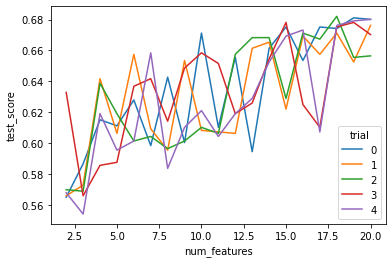

In [16]:
# Adaboost with Different Number of Features, randomized

ab_avg_accuracies_per_feature = []
for num_features in range(2,tfdf_features.count()['feature']):
    print(f"num_features: {num_features}")
    for trial in range(5):    
        # Save Top n Features to Array
        random_n_features = tfdf_features.sample(n=num_features)['feature']
#         print(f"random_n_features: ({len(random_n_features)}) {random_n_features}")

        # Make copy of df
        dev1 = dev.copy()

        # Remove all but top n features with regards to T/F diff averages
        dev1 = dev1[dev1.columns.intersection(np.append(random_n_features,["Decision"]))]    

        # Map object features to ints
        dev1, dtypedict = map_object_columns_to_int(dev1)

        # Map float features to ints
        dev1, dtypedict = map_float_columns_to_int(dev1)

        # Split into test and train sets
        train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=22)
        n_estimators = 100
        clf = AdaBoostClassifier(n_estimators=n_estimators)
        train_scores = cross_val_score(clf, train_1[random_n_features], train_1["Decision"], cv=5)
        clf.fit(train_1.drop("Decision",axis=1), train_1["Decision"])
        prediction_accuracy = clf.score(test_1.drop("Decision",axis=1), test_1["Decision"])
        ab_avg_accuracies_per_feature.append({
            "num_features": num_features,
            "trial": trial,
            "train_score": train_scores.mean(),
            "test_score": prediction_accuracy
        })
df_ab_avg_accuracies_per_feature = pd.DataFrame(ab_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="train_score", hue='trial', palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="test_score", hue='trial', palette="tab10")

From these results, there isn't really anything we can say about one feature vs. another.

## Feature Selection: Revisitied

In [79]:
# Make copy of df
dev1 = dev.copy()

# Remove all but top n features with regards to T/F diff averages
dev1 = dev1[dev1.columns.intersection(np.append(random_n_features,["Decision"]))]    

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

# Split into X and y datasets
(X, y) = dev1[random_n_features], dev1["Decision"]

#apply SelectKBest class to score best features using f_classif statistical test
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print("Features sorted by f_classif score:")
print(featureScores.sort_values('Score', ascending=False)) 
fclassif_features = featureScores.sort_values('Score', ascending=False)['Specs'].to_numpy()

#apply SelectKBest class to score best features using mutual_info_classif statistical test
bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print("Features sorted by mutual_info_classif score:")
print(featureScores.sort_values('Score', ascending=False)) 
mutualinfo_features = featureScores.sort_values('Score', ascending=False)['Specs'].to_numpy()



Features sorted by f_classif score:
                   Specs       Score
5        Coupon_validity  151.340178
1             Driving_to  144.701158
3               Distance  117.159311
18             Passanger  111.305590
14               Weather  111.141166
15           Coffeehouse  107.076567
4                 Coupon   63.264906
19      Restaurant20to50   52.444320
8                    Bar   48.517649
16           Temperature   44.918547
0               Children   24.402926
7   Restaurantlessthan20    8.427609
6              Carryaway    5.989255
9              Education    4.953981
10            Occupation    2.922073
11                   Age    2.392901
17        Direction_same    1.560509
12                  Time    0.709908
13         Maritalstatus    0.524453
2                 Income    0.126396
Features sorted by mutual_info_classif score:
                   Specs     Score
4                 Coupon  0.030886
14               Weather  0.012237
15           Coffeehouse  0.011991
3

These results show that f_classf seemed to be the better metric, and the fact that mutual_info_classif did not give high scores to any features means that none really have any duplicate info. 

Now, to compare svm using each number of features in list vs all features:

## SVM

feature list: ['Coupon_validity' 'Driving_to']
linear prediction_accuracy 0.5937193326790972
poly prediction_accuracy 0.5937193326790972
rbf prediction_accuracy 0.5937193326790972
sigmoid prediction_accuracy 0.5937193326790972
feature list: ['Coupon_validity' 'Driving_to' 'Distance']
linear prediction_accuracy 0.60549558390579
poly prediction_accuracy 0.6133464180569186
rbf prediction_accuracy 0.6182531894013739
sigmoid prediction_accuracy 0.478900883218842
feature list: ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger']
linear prediction_accuracy 0.6310107948969578
poly prediction_accuracy 0.6270853778213935
rbf prediction_accuracy 0.620215897939156
sigmoid prediction_accuracy 0.5240431795878312
feature list: ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather']
linear prediction_accuracy 0.6398429833169774
poly prediction_accuracy 0.6368989205103042
rbf prediction_accuracy 0.6329735034347399
sigmoid prediction_accuracy 0.4847890088321884
feature list: ['Coupon_validi

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/adamcarriker/opt/anac

linear prediction_accuracy 0.6575073601570167
poly prediction_accuracy 0.5711481844946026
rbf prediction_accuracy 0.5819430814524044
sigmoid prediction_accuracy 0.55053974484789
Training Score


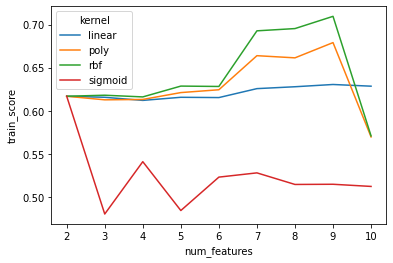

Testing Score


<AxesSubplot:xlabel='num_features', ylabel='test_score'>

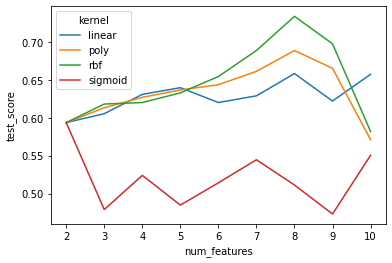

In [101]:
### Test SVM models for different number of features

# Make copy of df
dev1 = dev.copy()

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

svm_avg_accuracies_per_feature = []
for num_features in range(2,11): # run through top 10 features
    feature_list = fclassif_features[0:num_features]
    print(f'feature list: {feature_list}')

    # Split into test and train sets
    train_1, test_1 = train_test_split(dev1, test_size=0.10) #, random_state=1)
    (X_train, y_train) = train_1[feature_list], train_1["Decision"]
    (X_test, y_test) = test_1[feature_list], test_1["Decision"]
    
    
    # 1. Test linear classifier
    # Create classifier
    kernel = 'linear'
    clf = svm.LinearSVC(max_iter=100000)

    # Train classifier & report score with cross-validation
    train_scores = cross_val_score(clf, X_train, y_train, cv=5)
    clf.fit(X_train, y_train)
#     print(f"Training score mean: {train_scores.mean()}")

    # Test classifier & report score
    predicted_values = clf.predict(X_test)
    prediction_accuracy = clf.score(X_test, y_test)
    print("linear prediction_accuracy", prediction_accuracy)
    predicted_probabilities = clf.decision_function(X_test)
    svm_avg_accuracies_per_feature.append({
        "num_features": num_features,
        "kernel": 'linear',
        "train_score": train_scores.mean(),
        "test_score": prediction_accuracy
    })
    
    # 2. Test other classifier types
    for kernel in ['poly', 'rbf', 'sigmoid']:
        # Create classifier
        clf = svm.SVC(kernel=kernel, max_iter=1000000)

        # Train classifier & report score with cross-validation
        train_scores = cross_val_score(clf, X_train, y_train, cv=5)
        clf.fit(X_train, y_train)
    #     print(f"Training score mean: {train_scores.mean()}")

        # Test classifier & report score
        predicted_values = clf.predict(X_test)
        prediction_accuracy = clf.score(X_test, y_test)
        print(f"{kernel} prediction_accuracy", prediction_accuracy)
        predicted_probabilities = clf.decision_function(X_test)
        svm_avg_accuracies_per_feature.append({
            "num_features": num_features,
            "kernel": kernel,
            "train_score": train_scores.mean(),
            "test_score": prediction_accuracy
        })
        
df_svm_avg_accuracies_per_feature = pd.DataFrame(svm_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_svm_avg_accuracies_per_feature, x="num_features", y="train_score", hue='kernel', palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_svm_avg_accuracies_per_feature, x="num_features", y="test_score", hue='kernel', palette="tab10")


Takeaways: Sigmoid is garbage, and everything else seems to do best at 8 features. I'll try running SVM with each of the 3 kernels with 8 features.

feature list: ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50']
poly Training score mean: 0.6656846699399891
poly prediction_accuracy 0.6575073601570167


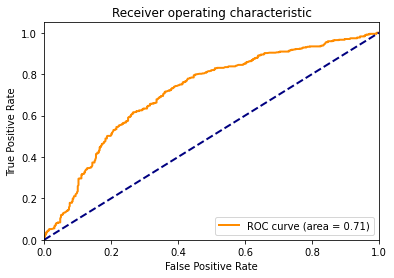

rbf Training score mean: 0.6988543371522095
rbf prediction_accuracy 0.7134445534838076


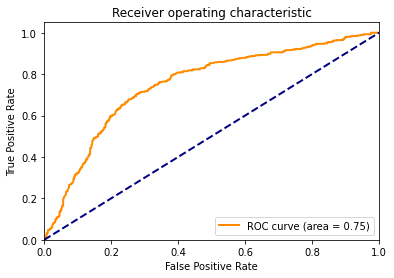

linear Training score mean: 0.6302236770321876
linear prediction_accuracy 0.6045142296368989


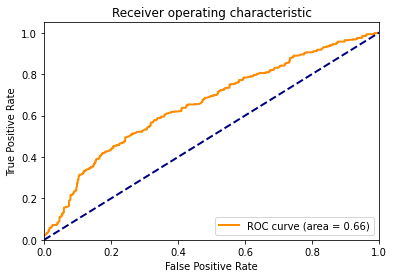

In [102]:
### Test SVM models for different number of features

# Make copy of df
dev1 = dev.copy()

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)


feature_list = fclassif_features[0:8]
print(f'feature list: {feature_list}')

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10) #, random_state=1)
(X_train, y_train) = train_1[feature_list], train_1["Decision"]
(X_test, y_test) = test_1[feature_list], test_1["Decision"]
    
# Test each kernel, save model
for kernel in ['poly', 'rbf', 'linear']:
    # Create classifier
    clf = svm.SVC(kernel=kernel, max_iter=1000000)

    # Train classifier & report score with cross-validation
    train_scores = cross_val_score(clf, X_train, y_train, cv=5)
    clf.fit(X_train, y_train)
    print(f"{kernel} Training score mean: {train_scores.mean()}")

    # Test classifier & report score
    predicted_values = clf.predict(X_test)
    prediction_accuracy = clf.score(X_test, y_test)
    print(f"{kernel} prediction_accuracy", prediction_accuracy)
    predicted_probabilities = clf.decision_function(X_test)
    svm_avg_accuracies_per_feature.append({
        "num_features": num_features,
        "kernel": kernel,
        "train_score": train_scores.mean(),
        "test_score": prediction_accuracy
    })    

    compute_and_plot_roc_curve(test_1["Decision"],predicted_probabilities)

    # Save model
    save_dir = f"outputs/rules/SVM/{kernel}/final/1"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    dump(clf, f'{save_dir}/model.joblib') 

The best was poly, which had a success rate of 0.612. The others didn't get above 0.6. Let's dive in more on poly.

feature list: ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50']


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning

0.5 Training score mean: 0.6762684124386252
0.5 prediction_accuracy 0.6673209028459274


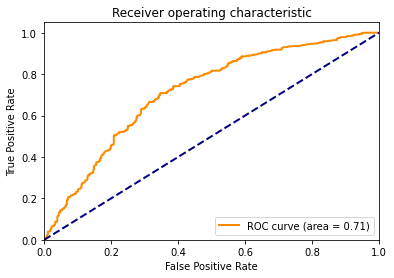

0.25 Training score mean: 0.6736497545008183
0.25 prediction_accuracy 0.6692836113837095


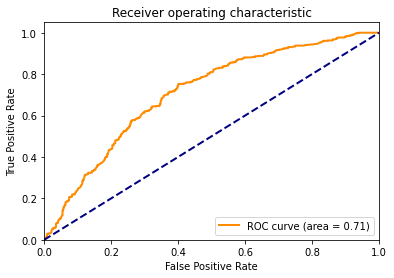

0.125 Training score mean: 0.6722313147845063
0.125 prediction_accuracy 0.6594700686947988


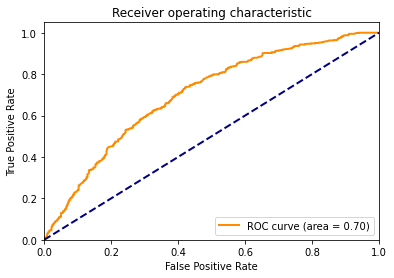

0.0625 Training score mean: 0.6640480087288598
0.0625 prediction_accuracy 0.6526005888125613


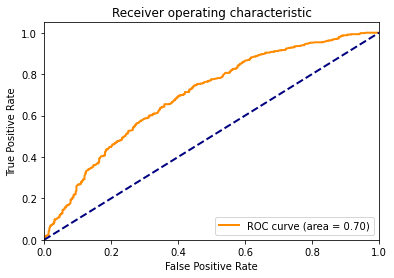

0.03125 Training score mean: 0.6543371522094926
0.03125 prediction_accuracy 0.6486751717369971


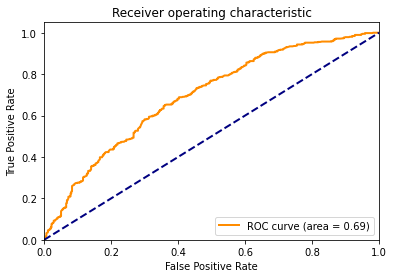

Training Score


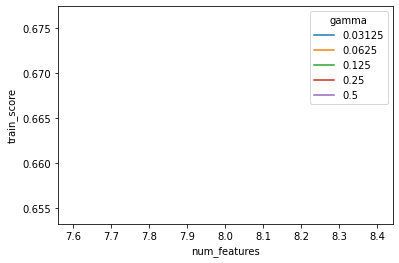

Testing Score


<AxesSubplot:xlabel='num_features', ylabel='test_score'>

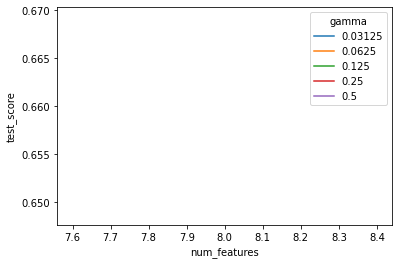

In [108]:
### Run poly with 8 features and different values for gamma

# Make copy of df
dev1 = dev.copy()

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

feature_list = fclassif_features[0:8]
print(f'feature list: {feature_list}')

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10) #, random_state=1)
(X_train, y_train) = train_1[feature_list], train_1["Decision"]
(X_test, y_test) = test_1[feature_list], test_1["Decision"]
    
# Test each gamma, plot
svm_avg_accuracies_per_feature = []
for gamma in [1/2,1/4,1/8,1/16,1/32]:
    kernel='poly'
    # Create classifier
    clf = svm.SVC(kernel=kernel, gamma=gamma, max_iter=10000000)

    # Train classifier & report score with cross-validation
    train_scores = cross_val_score(clf, X_train, y_train, cv=5)
    clf.fit(X_train, y_train)
    print(f"{gamma} Training score mean: {train_scores.mean()}")

    # Test classifier & report score
    predicted_values = clf.predict(X_test)
    prediction_accuracy = clf.score(X_test, y_test)
    print(f"{gamma} prediction_accuracy", prediction_accuracy)
    predicted_probabilities = clf.decision_function(X_test)
    svm_avg_accuracies_per_feature.append({
        "num_features": 8,
        "gamma": gamma,
        "train_score": train_scores.mean(),
        "test_score": prediction_accuracy
    })    

    compute_and_plot_roc_curve(test_1["Decision"],predicted_probabilities)

It seems that 1/2 and 1/4 were the best values, but they don't really change the ROC or accuracy from the previous value (1/8).

We'll try running rbf for giggles too:

feature list: ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50']
2 Training score mean: 0.6640480087288597
2 prediction_accuracy 0.6918547595682041


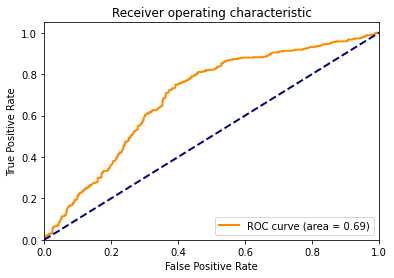

1 Training score mean: 0.6836879432624114
1 prediction_accuracy 0.6957801766437685


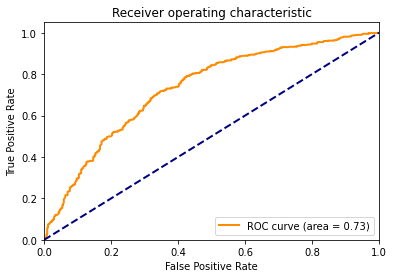

0.5 Training score mean: 0.6983087834151664
0.5 prediction_accuracy 0.6977428851815506


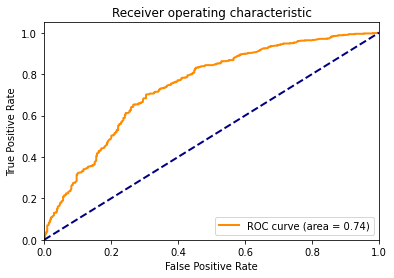

0.25 Training score mean: 0.7031096563011456
0.25 prediction_accuracy 0.6997055937193327


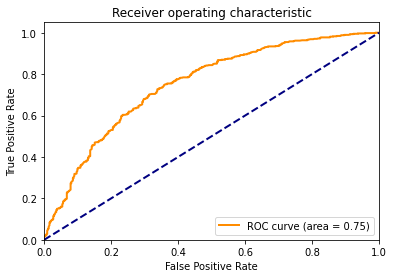

0.125 Training score mean: 0.7027823240589199
0.125 prediction_accuracy 0.6908734052993131


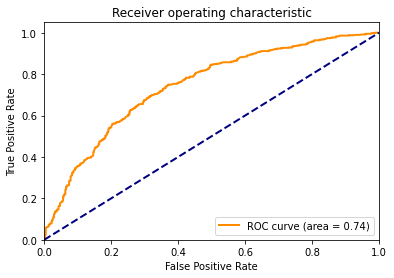

0.0625 Training score mean: 0.6993998908892525
0.0625 prediction_accuracy 0.6781157998037292


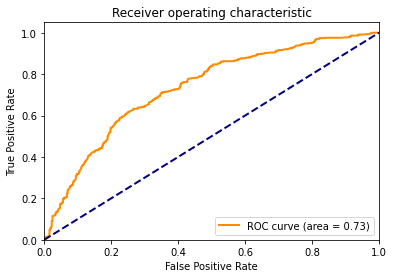

0.03125 Training score mean: 0.6860883797054009
0.03125 prediction_accuracy 0.6722276741903828


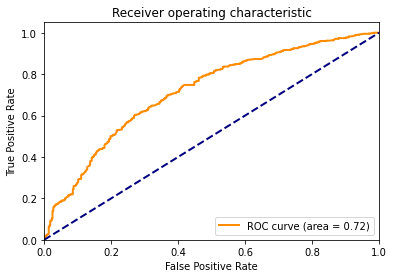

Training Score


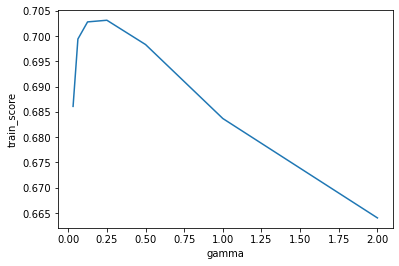

Testing Score


<AxesSubplot:xlabel='gamma', ylabel='test_score'>

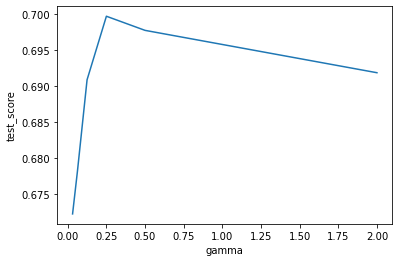

In [109]:
### Run poly with 8 features and different values for gamma

# Make copy of df
dev1 = dev.copy()

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

feature_list = fclassif_features[0:8]
print(f'feature list: {feature_list}')

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10) #, random_state=1)
(X_train, y_train) = train_1[feature_list], train_1["Decision"]
(X_test, y_test) = test_1[feature_list], test_1["Decision"]
    
# Test each gamma, plot
svm_avg_accuracies_per_feature = []
for gamma in [2,1,1/2,1/4,1/8,1/16,1/32]:
    kernel='rbf'
    # Create classifier
    clf = svm.SVC(kernel=kernel, gamma=gamma, max_iter=10000000)

    # Train classifier & report score with cross-validation
    train_scores = cross_val_score(clf, X_train, y_train, cv=5)
    clf.fit(X_train, y_train)
    print(f"{gamma} Training score mean: {train_scores.mean()}")

    # Test classifier & report score
    predicted_values = clf.predict(X_test)
    prediction_accuracy = clf.score(X_test, y_test)
    print(f"{gamma} prediction_accuracy", prediction_accuracy)
    predicted_probabilities = clf.decision_function(X_test)
    svm_avg_accuracies_per_feature.append({
        "num_features": 8,
        "gamma": gamma,
        "train_score": train_scores.mean(),
        "test_score": prediction_accuracy
    })    

    compute_and_plot_roc_curve(test_1["Decision"],predicted_probabilities)
    
df_svm_avg_accuracies_per_feature = pd.DataFrame(svm_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_svm_avg_accuracies_per_feature, x="gamma", y="train_score") #, hue='kernel', palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_svm_avg_accuracies_per_feature, x="gamma", y="test_score") #, hue='kernel', palette="tab10")


clearly gamma=1/4 is the best for rbf.

### Adaboost round 2

going to try to use F-test scores with adaboost

top_n_features: (2) ['Coupon' 'Weather']
top_n_features: (3) ['Coupon' 'Weather' 'Coffeehouse']
top_n_features: (4) ['Coupon' 'Weather' 'Coffeehouse' 'Distance']
top_n_features: (5) ['Coupon' 'Weather' 'Coffeehouse' 'Distance' 'Passanger']
top_n_features: (6) ['Coupon' 'Weather' 'Coffeehouse' 'Distance' 'Passanger' 'Time']
top_n_features: (7) ['Coupon' 'Weather' 'Coffeehouse' 'Distance' 'Passanger' 'Time'
 'Driving_to']
top_n_features: (8) ['Coupon' 'Weather' 'Coffeehouse' 'Distance' 'Passanger' 'Time'
 'Driving_to' 'Coupon_validity']
top_n_features: (9) ['Coupon' 'Weather' 'Coffeehouse' 'Distance' 'Passanger' 'Time'
 'Driving_to' 'Coupon_validity' 'Restaurantlessthan20']
top_n_features: (10) ['Coupon' 'Weather' 'Coffeehouse' 'Distance' 'Passanger' 'Time'
 'Driving_to' 'Coupon_validity' 'Restaurantlessthan20' 'Restaurant20to50']
top_n_features: (11) ['Coupon' 'Weather' 'Coffeehouse' 'Distance' 'Passanger' 'Time'
 'Driving_to' 'Coupon_validity' 'Restaurantlessthan20' 'Restaurant20to50'


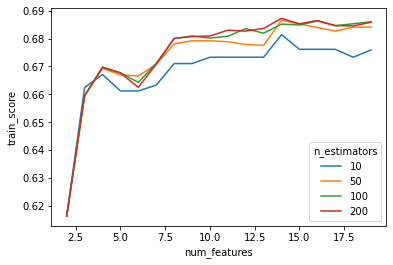

Testing Score


<AxesSubplot:xlabel='num_features', ylabel='test_score'>

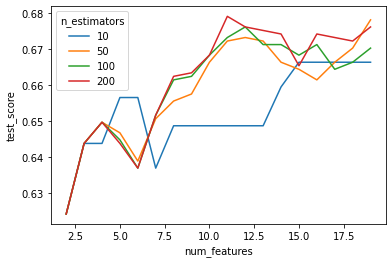

In [137]:
# Adaboost with Different Number of Features, using fclassif_features

ab_avg_accuracies_per_feature = []
for num_features in range(2,len(mutualinfo_features)):
    
    # Save Top n Features to Array
    top_n_features = mutualinfo_features[0:num_features]
    print(f"top_n_features: ({len(top_n_features)}) {top_n_features}")
    
    # Make copy of df
    dev1 = dev.copy()

    # Remove all but top n features with regards to T/F diff averages
    dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]    

    # Map object features to ints
    dev1, dtypedict = map_object_columns_to_int(dev1)

    # Map float features to ints
    dev1, dtypedict = map_float_columns_to_int(dev1)

    # Split into test and train sets
    train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=22)
    for n_estimators in [10,50,100,200]:
        clf = AdaBoostClassifier(n_estimators=n_estimators)
        train_scores = cross_val_score(clf, train_1[top_n_features], train_1["Decision"], cv=5)
        clf.fit(train_1.drop("Decision",axis=1), train_1["Decision"])
        prediction_accuracy = clf.score(test_1.drop("Decision",axis=1), test_1["Decision"])
        ab_avg_accuracies_per_feature.append({
            "num_features": num_features,
            "n_estimators": n_estimators,
            "train_score": train_scores.mean(),
            "test_score": prediction_accuracy
        })
df_ab_avg_accuracies_per_feature = pd.DataFrame(ab_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="train_score", hue='n_estimators', palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="test_score", hue='n_estimators', palette="tab10")

Training Score


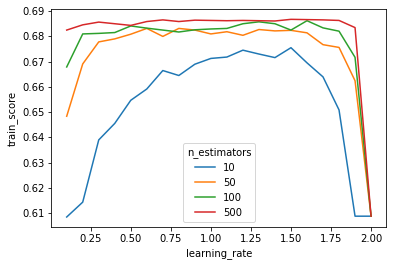

Testing Score


<AxesSubplot:xlabel='learning_rate', ylabel='test_score'>

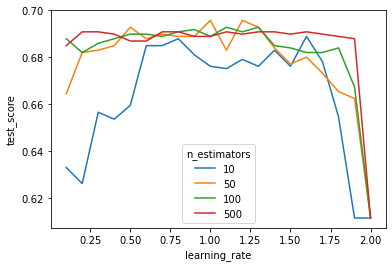

In [142]:
# Adaboost with Different Number of Features, using fclassif_features

# Make copy of df
dev1 = dev.copy()

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10) #, random_state=1)

ab_avg_accuracies_per_feature = []
for learning_rate in np.arange(0.1, 2.1, 0.1):    
    for n_estimators in [100,200,500,1000]:
        clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        train_scores = cross_val_score(clf, train_1.drop(["Decision","id"],axis=1), train_1["Decision"], cv=5)
        clf.fit(train_1.drop(["Decision","id"],axis=1), train_1["Decision"])
        prediction_accuracy = clf.score(test_1.drop(["Decision","id"],axis=1), test_1["Decision"])
        ab_avg_accuracies_per_feature.append({
            "learning_rate": learning_rate,
            "n_estimators": n_estimators,
            "train_score": train_scores.mean(),
            "test_score": prediction_accuracy
        })
df_ab_avg_accuracies_per_feature = pd.DataFrame(ab_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="learning_rate", y="train_score", hue='n_estimators', palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="learning_rate", y="test_score", hue='n_estimators', palette="tab10")

top_n_features: (2) ['Coupon_validity' 'Driving_to']
top_n_features: (3) ['Coupon_validity' 'Driving_to' 'Distance']
top_n_features: (4) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger']
top_n_features: (5) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather']
top_n_features: (6) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse']
top_n_features: (7) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon']
top_n_features: (8) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50']
top_n_features: (9) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar']
top_n_features: (10) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature']
top_n_features: (11) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeeho

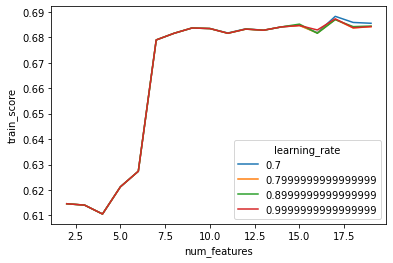

Testing Score


<AxesSubplot:xlabel='num_features', ylabel='test_score'>

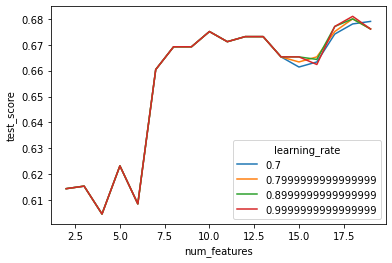

In [163]:
# Adaboost with Different Number of Features, using fclassif_features / mutualinfo_features

ab_avg_accuracies_per_feature = []
for num_features in range(2,len(fclassif_features)):
    
    # Save Top n Features to Array
    top_n_features = fclassif_features[0:num_features]
    print(f"top_n_features: ({len(top_n_features)}) {top_n_features}")
    
    # Make copy of df
    dev1 = dev.copy()

    # Remove all but top n features with regards to T/F diff averages
    dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]    

    # Map object features to ints
    dev1, dtypedict = map_object_columns_to_int(dev1)

    # Map float features to ints
    dev1, dtypedict = map_float_columns_to_int(dev1)

    # Split into test and train sets
    train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=22)
    for learning_rate in np.arange(0.7, 1.0, 0.1):#n_estimators in [100,300,500]:
        n_estimators = 500
        clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        train_scores = cross_val_score(clf, train_1[top_n_features], train_1["Decision"], cv=5)
        clf.fit(train_1.drop("Decision",axis=1), train_1["Decision"])
        prediction_accuracy = clf.score(test_1.drop("Decision",axis=1), test_1["Decision"])
        ab_avg_accuracies_per_feature.append({
            "num_features": num_features,
            "learning_rate": learning_rate,
            "train_score": train_scores.mean(),
            "test_score": prediction_accuracy
        })
df_ab_avg_accuracies_per_feature = pd.DataFrame(ab_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="train_score", hue='learning_rate', palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="test_score", hue='learning_rate', palette="tab10")

### Run adaboost again, save model to 2/

Training score mean: 0.68738564393621
prediction_accuracy 0.680628272251309
[ 0.00300585 -0.00068116 -0.00034218 ...  0.00281226  0.0025608
  0.00090438]


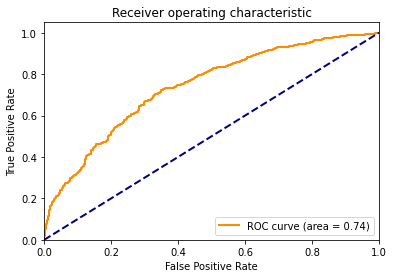

<AxesSubplot:xlabel='feature_importance', ylabel='feature'>

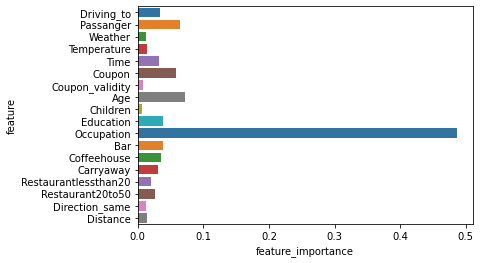

In [188]:
### Create Adaboost model with all features and num_estimators=100

# Make copy of df
dev1 = dev.copy()

# Remove all but top 17 features with regards to fclassif score
dev1 = dev1[dev1.columns.intersection(np.append(fclassif_features[0:18],["Decision"]))]  

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.15) #, random_state=1)


# Create classifier
clf = AdaBoostClassifier(n_estimators=500, learning_rate=1.2)

# Train classifier & report score with cross-validation
train_scores = cross_val_score(clf, train_1.drop("Decision",axis=1), train_1["Decision"], cv=5)
clf.fit(train_1.drop("Decision",axis=1), train_1["Decision"])
print(f"Training score mean: {train_scores.mean()}")

# Test classifier & report score
predicted_values = clf.predict(test_1.drop("Decision",axis=1))
prediction_accuracy = clf.score(test_1.drop("Decision",axis=1), test_1["Decision"])
print("prediction_accuracy", prediction_accuracy)
predicted_probabilities = clf.decision_function(test_1.drop("Decision",axis=1))

compute_and_plot_roc_curve(test_1["Decision"],predicted_probabilities)

# Save model
save_dir = "outputs/rules/Adaboost/final/2"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
dump(clf, f'{save_dir}/model.joblib') 

# Print feature importance
fs = test_1.drop("Decision",axis=1).columns.values.tolist()
fidata = [{'feature': f, 'feature_importance': i} for (f,i) in zip(fs, clf.feature_importances_)]
df_fidata = pd.DataFrame(fidata)

sns.barplot(data=df_fidata, x='feature_importance', y='feature' , palette="tab10" )


# XGBoost

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training score mean: 0.754391707583197
prediction_accuracy 0.7585868498527969


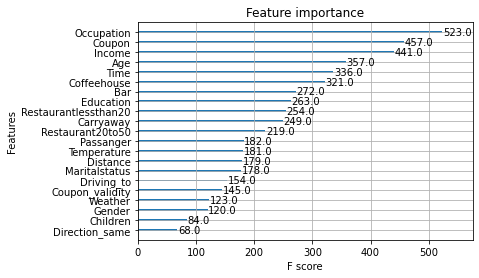

In [263]:
### Create XGBoost model with all features and num_estimators=100
dev1 = dev.copy()
dev1 = dev1.drop("id",axis=1)


# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=1)

# Map object features to ints
train_1, dtypemap = map_object_columns_to_int(train_1)

# Use map above to convert test objects to ints
test_1 = map_object_columns_given_map(test_1,dtypemap)

# Create X and y sets
(X_train, y_train) = (train_1.drop("Decision",axis=1), train_1["Decision"])
(X_test, y_test) = (test_1.drop("Decision",axis=1), test_1["Decision"])

# Create classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic")

# Train classifier & report score with cross-validation
train_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
xgb_model.fit(X_train, y_train)
print(f"Training score mean: {train_scores.mean()}")

# Test classifier & report score
predicted_values = xgb_model.predict(X_test)
prediction_accuracy = accuracy_score(y_test, predicted_values)
print("prediction_accuracy", prediction_accuracy)

xgb.plot_importance(xgb_model)

# Save model
save_dir = "outputs/rules/XGBoost/final/1"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
xgb_model.save_model(f'{save_dir}/model.json') 


booster = xgb.Booster()
booster.load_model(f"{save_dir}/model.json")

# Save interpretable model
save_dir = "outputs/rules/XGBoost/interpretable/1"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
booster.dump_model(f'{save_dir}/model.json') 




In [ ]:
# Open object map
dtypemap2 = None
save_dir = "outputs/rules/XGBoost/final/1"
with open(f"{save_dir}/object_map/object_map.json", "r") as f:
    dtypemap2 = json.load(f)
    
test_1 = map_object_columns_given_map(test_1,dtypemap)

(X_test, y_test) = (test_1.drop("Decision",axis=1), test_1["Decision"])

# Test classifier & report score
predicted_values = xgb_model.predict(X_test)
prediction_accuracy = accuracy_score(y_test, predicted_values)
print("prediction_accuracy", prediction_accuracy)

xgb.plot_importance(xgb_model)

top_n_features: (2) ['Coupon_validity' 'Driving_to']
[10:26:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anacon

[10:26:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6143277723258096
top_n_feat

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anacon

[10:26:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.619234543670265
top_n_featu

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6290480863591756
top_n_features: (5) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather']
[10:26:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6486751717369971
top_n_features: (6) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse']
[10:26:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anacon

[10:26:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6398429833169774
top_n_features: (7) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon']
[10:26:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.676153091265947
top_n_features: (8) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50']
[10:26:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6830225711481845
top_n_features: (9) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar']
[10:26:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6987242394504416
top_n_features: (10) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature']
[10:26:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6938174681059862
top_n_features: (11) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children']
[10:26:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.6938174681059862
top_n_features: (12) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20']
[10:26:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.704612365063788
top_n_features: (13) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20' 'Carryaway']
[10:26:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.7065750736015701
top_n_features: (14) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20' 'Carryaway' 'Education']
[10:26:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.7497546614327772
top_n_features: (15) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20' 'Carryaway' 'Education' 'Occupation']
[10:26:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.7556427870461236
top_n_features: (16) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20' 'Carryaway' 'Education' 'Occupation' 'Age']
[10:26:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.7566241413150148
top_n_features: (17) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20' 'Carryaway' 'Education' 'Occupation' 'Age'
 'Direction_same']
[10:27:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.7487733071638861
top_n_features: (18) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20' 'Carryaway' 'Education' 'Occupation' 'Age'
 'Direction_same' 'Time']
[10:27:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.7546614327772326
top_n_features: (19) ['Coupon_validity' 'Driving_to' 'Distance' 'Passanger' 'Weather'
 'Coffeehouse' 'Coupon' 'Restaurant20to50' 'Bar' 'Temperature' 'Children'
 'Restaurantlessthan20' 'Carryaway' 'Education' 'Occupation' 'Age'
 'Direction_same' 'Time' 'Maritalstatus']
[10:27:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
prediction_accuracy 0.7546614327772326
Training Score


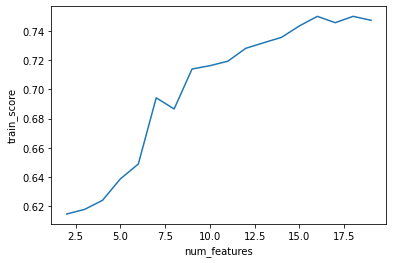

Testing Score


<AxesSubplot:xlabel='num_features', ylabel='test_score'>

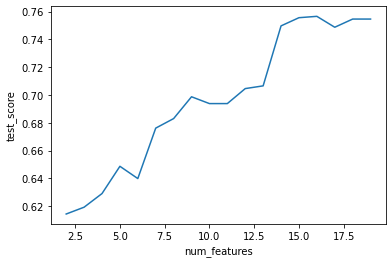

In [199]:
# XGboost with Different Number of Features, using fclassif_features / mutualinfo_features

ab_avg_accuracies_per_feature = []
for num_features in range(2,len(fclassif_features)):
    
    # Save Top n Features to Array
    top_n_features = fclassif_features[0:num_features]
    print(f"top_n_features: ({len(top_n_features)}) {top_n_features}")
    
    # Make copy of df
    dev1 = dev.copy()

    # Remove all but top n features with regards to T/F diff averages
    dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]    

    # Map object features to ints
    dev1, dtypedict = map_object_columns_to_int(dev1)

    # Map float features to ints
    dev1, dtypedict = map_float_columns_to_int(dev1)

    # Split into test and train sets
    train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=22)
    (X_train, y_train) = (train_1.drop("Decision",axis=1), train_1["Decision"])
    (X_test, y_test) = (test_1.drop("Decision",axis=1), test_1["Decision"])
    # Create classifier
    xgb_model = xgb.XGBClassifier(objective="binary:logistic")

    # Train classifier & report score with cross-validation
    train_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
    xgb_model.fit(X_train, y_train)

    # Test classifier & report score
    predicted_values = xgb_model.predict(X_test)
    prediction_accuracy = accuracy_score(y_test, predicted_values)
    print("prediction_accuracy", prediction_accuracy)
    ab_avg_accuracies_per_feature.append({
        "num_features": num_features,
        "train_score": train_scores.mean(),
        "test_score": prediction_accuracy
    })
df_ab_avg_accuracies_per_feature = pd.DataFrame(ab_avg_accuracies_per_feature)

print("Training Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="train_score", palette="tab10")
plt.show()
print("Testing Score")
sns.lineplot(data=df_ab_avg_accuracies_per_feature, x="num_features", y="test_score",  palette="tab10")

Based on the above results, we could probably scale down to 15 features and still have best accuracy

/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/adamcarriker/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training score mean: 0.7292962356792143
prediction_accuracy 0.7350343473994112


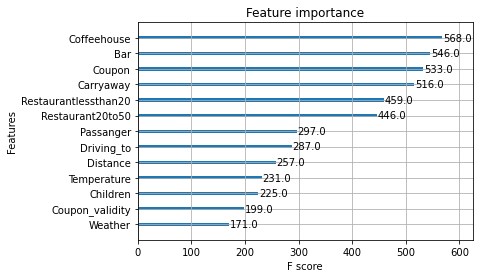

In [201]:

# Save Top n Features to Array
top_n_features = fclassif_features[0:13]
    
    ### Create XGBoost model with all features and num_estimators=100
dev1 = dev.copy()
dev1 = dev1[dev1.columns.intersection(np.append(top_n_features,["Decision"]))]  

# Map object features to ints
dev1, dtypedict = map_object_columns_to_int(dev1)

# Map float features to ints
dev1, dtypedict = map_float_columns_to_int(dev1)

# Split into test and train sets
train_1, test_1 = train_test_split(dev1, test_size=0.10, random_state=1)
(X_train, y_train) = (train_1.drop("Decision",axis=1), train_1["Decision"])
(X_test, y_test) = (test_1.drop("Decision",axis=1), test_1["Decision"])

# Create classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic")

# Train classifier & report score with cross-validation
train_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
xgb_model.fit(X_train, y_train)
print(f"Training score mean: {train_scores.mean()}")

# Test classifier & report score
predicted_values = xgb_model.predict(X_test)
prediction_accuracy = accuracy_score(y_test, predicted_values)
print("prediction_accuracy", prediction_accuracy)

xgb.plot_importance(xgb_model)

# Save model
save_dir = "outputs/rules/XGBoost/final/2"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
xgb_model.save_model(f'{save_dir}/model.json') 

booster = xgb.Booster()
booster.load_model(f"{save_dir}/model.json")

# Save interpretable model
save_dir = "outputs/rules/XGBoost/interpretable/2"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
booster.dump_model(f'{save_dir}/model.json') 



## Running Prod Data

### Import and Clean Prod Dataset

In [104]:
# TODO: Clean Prod Data

# --- 1. Import Data ---
prod = pd.read_csv("data/test.csv")

# --- 2. Clean Data ---
# Map object features to ints
prod, dtypedict = map_object_columns_to_int(prod)

# Map float features to ints
prod, dtypedict2 = map_float_columns_to_int(prod)


### Run Adaboost Model

In [170]:
# Open Adaboost model file
save_dir = "outputs/rules/Adaboost/final/2"
clf1 = load(f'{save_dir}/model.joblib') 

# Run classifier  
predicted_values = clf1.predict(prod[fclassif_features[0:18]])

# Output predictions to csv file
df_predictions = pd.DataFrame({'id':range(1,predicted_values.shape[0]+1),'Decision':predicted_values})
df_predictions["Decision"] = df_predictions["Decision"].astype("int")
print(df_predictions.head())
output_path = "outputs/predictions/prod/2"
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_predictions.to_csv(f'{output_path}/adaboost.csv',index=False)


   id  Decision
0   1         1
1   2         1
2   3         0
3   4         1
4   5         1


### Run SVM Models

In [106]:
# Open SVM model file
feature_list = fclassif_features[0:8]
prod1 = prod[feature_list]
for kernel in ['poly', 'rbf', 'linear']:
    save_dir = f"outputs/rules/SVM/{kernel}/final/1"
    clf1 = load(f'{save_dir}/model.joblib') 

    # Run classifier
    predicted_values = clf1.predict(prod1)

    # Output predictions to csv file
    df_predictions = pd.DataFrame({'id':range(1,predicted_values.shape[0]+1),'Decision':predicted_values})
    df_predictions["Decision"] = df_predictions["Decision"].astype("int")
    print(df_predictions.head())
    output_path = "outputs/predictions/prod"
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    df_predictions.to_csv(f'{output_path}/svm_{kernel}.csv',index=False)

   id  Decision
0   1         1
1   2         1
2   3         1
3   4         1
4   5         1
   id  Decision
0   1         0
1   2         0
2   3         1
3   4         1
4   5         1
   id  Decision
0   1         1
1   2         1
2   3         1
3   4         0
4   5         1


## Run XGBoost Model

In [254]:
prod_1 = prod.copy()
prod_1 = prod_1.drop("id",axis=1)


# Use map above to convert test objects to ints
prod_1 = map_object_columns_given_map(prod_1,dtypemap)

# Open XGBoost model file
save_dir = "outputs/rules/XGBoost/final/1"
xgb_model = xgb.XGBClassifier()
xgb_model.load_model(f"{save_dir}/model.json")

# Run classifier  
predicted_values = xgb_model.predict(prod_1)

# Output predictions to csv file
df_predictions = pd.DataFrame({'id':range(1,predicted_values.shape[0]+1),'Decision':predicted_values})
df_predictions["Decision"] = df_predictions["Decision"].astype("int")
print(df_predictions.head())
output_path = "outputs/predictions/prod"
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_predictions.to_csv(f'{output_path}/XGBoost1.csv',index=False)


   id  Decision
0   1         1
1   2         0
2   3         0
3   4         0
4   5         1


# Appendix

In [7]:
def print_model(m):
    svm_type = m.get_svm_type()
    nr_class = m.get_nr_class()
    svr_probability = m.get_svr_probability()
    class_labels = m.get_labels()
    sv_indices = m.get_sv_indices()
    nr_sv = m.get_nr_sv()
    is_prob_model = m.is_probability_model()
    sv_coefficients = m.get_sv_coef()
    svs = m.get_SV()
    print("svm_type:", svm_type)
    print("nr_class:", nr_class)
    print("svr_probability:", svr_probability)
    print("labels:", class_labels)
    print("sv_indices:", sv_indices)
    print("nr_sv:", nr_sv)
    print("probability_model:",is_prob_model)
    print("SVs (10):")
    pprint(svs[:10])
    print("SV coefficients, SVs (10):")
    pprint(list(zip(sv_coefficients[:10],svs[:10])))

In [8]:
def compute_and_plot_roc_curve(dataset, model_output): 
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in [0,1]:
        fpr[i], tpr[i], _ = roc_curve(dataset.to_numpy(), np.asarray(model_output)) 
        roc_auc[i] = auc(fpr[i], tpr[i])

    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(
        fpr[1],
        tpr[1],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[1],
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [225]:
def map_object_columns_to_int(df): # TODO: would it be better to hash the strings?
    # Make copy of df
    df1 = df.copy()

    # Change all other str columns to int
    dtypedict = dict(df1.dtypes)
    for i,(f_name, dtype) in enumerate(dtypedict.items()):
        if f_name in ['id', 'Decision']: continue
        if dtype == 'object':        
            # Update dtypeobject dict to include stringmaps for string fields to new int values
            dtypedict[f_name] = {'dtype':dtype,'strmap':{v:i for i,v in list(enumerate(df1[f_name].unique())) } }
#             for i,val in enumerate(df1[f_name].unique()):
#                 # Update values in df for that feature
#                 df1[f_name].replace(val,i,inplace=True)
            for val,i in dtypedict[f_name]['strmap'].items():
                # Update values in df for that feature
                df1[f_name].replace(val,i,inplace=True)
            # Convert column from str to int object
            df1[f_name].astype('int')
    return df1, dtypedict 

In [243]:
def map_float_columns_to_int(df): # TODO: would it be better to hash the strings?
    # Make copy of df
    df1 = df.copy()

    # Change all other float columns to int
    dtypedict = dict(df1.dtypes)
    for i,(f_name, dtype) in enumerate(dtypedict.items()):
        if f_name in ['id', 'Decision']: continue
        if dtype == 'float64' :     
            # Update dtypeobject dict to include stringmaps for string fields to new int values
            dtypedict[f_name] = {'dtype':dtype,'strmap':{v:i for i,v in list(enumerate(df1[f_name].unique())) } }
#             for i,val in enumerate(df1[f_name].unique()):
#                 # Update values in df for that feature
#                 df1[f_name].replace(val,i,inplace=True)
            for val,i in dtypedict[f_name]['strmap'].items():
                # Update values in df for that feature
                df1[f_name].replace(val,i,inplace=True)
            # Convert column from str to int object
            df1[f_name].astype('int')
            
    return df1, dtypedict 

In [253]:
def map_object_columns_given_map(df,m):
    # Make copy of df
    df1 = df.copy()
    
    # Change all object types represented as ints back to their original object value
    dtypedict = dict(df1.dtypes)
    for i,(f_name, dtype) in enumerate(dtypedict.items()):
        if f_name in ['id', 'Decision']: continue
        if dtype == 'object':        
            for i,val in enumerate(df1[f_name].unique()):
                if val in m[f_name]['strmap'].keys():
                    # hit from map, assign to that value
                    map_val = m[f_name]['strmap'][val]
                    df1[f_name].replace(val,map_val,inplace=True)  
                else:
                    # no hit, assign to -1
                    df1[f_name].replace(val,-1,inplace=True)
                    print(f"No match found for feature: {f_name}, value: {val}")
            # Convert column from str to int object
            df1[f_name].astype('int')
    return df1

## The following functions are copied from chefboost. I do not claim authorship over the original functions.

In [5]:
''' This code is based on Chefboost's Chefboost.py code that can be found here:
https://github.com/serengil/chefboost/blob/d062f78d40e0d11852eca864736eef4656a03a05/chefboost/Chefboost.py
I claim no authorship over the code other than the changes I made here.
'''
from chefboost.commons import functions

def evaluate_mod(model, df, task = 'test'):

    """
    Parameters:
        model (built chefboost model): you should pass the return of fit function
        df (pandas data frame): data frame you would like to evaluate
        task (string): optionally you can pass this train, validation or test
    """

    functions.bulk_prediction(df, model)

    enableAdaboost = model["config"]["enableAdaboost"]

    if enableAdaboost == True:
        df['Decision'] = df['Decision'].astype(str)
        df['Prediction'] = df['Prediction'].astype(str)

    return evaluate(df, task = task)

In [6]:
''' This code is based on Chefboost's evaluate.py code that can be found here:
https://github.com/serengil/chefboost/blob/d062f78d40e0d11852eca864736eef4656a03a05/chefboost/commons/evaluate.py
I claim no authorship over the code other than the changes I made here.
'''

import math

def evaluate(df, task = 'train'):
	analytics = {}
	
	if df['Decision'].dtypes == 'object':
		problem_type = 'classification'
	else:
		problem_type = 'regression'
		
	#-------------------------------------
	
	instances = df.shape[0]
	
	#print("-------------------------")
	#print("Evaluate ",task,"set")
	#print("-------------------------")
	
	if problem_type == 'classification':
		
		idx = df[df['Prediction'] == df['Decision']].index
		accuracy = 100*len(idx)/df.shape[0]
		#print("Accuracy: ", accuracy,"% on ",instances," instances")
		analytics['accuracy'] = accuracy
		
		#-----------------------------
		
		predictions = df.Prediction.values
		actuals = df.Decision.values
		
		#-----------------------------
		#confusion matrix
		
		#labels = df.Prediction.unique()
		labels = df.Decision.unique()
		
		confusion_matrix = []
		for prediction_label in labels:
			confusion_row = []
			for actual_label in labels:
				item = len(df[(df['Prediction'] == prediction_label) 
						& (df['Decision'] == actual_label)]['Decision'].values)
				confusion_row.append(item)
			confusion_matrix.append(confusion_row)
		
		#print("Labels: ", labels)
		#print("Confusion matrix: ",confusion_matrix)
		analytics['labels'] = labels
		analytics['confusion_matrix'] = confusion_matrix
		
		#-----------------------------
		#precision and recall
						
		for decision_class in labels:
			
			fp = 0; fn = 0; tp = 0; tn = 0
			for i in range(0, len(predictions)):
				prediction = predictions[i]
				actual = actuals[i]
				
				if actual == decision_class and prediction == decision_class:
					tp = tp + 1
				elif actual != decision_class and prediction != decision_class:
					tn = tn + 1
				elif actual != decision_class and prediction == decision_class:
					fp = fp + 1
				elif actual == decision_class and prediction != decision_class:
					fn = fn + 1
			
			epsilon = 0.0000001 #to avoid divison by zero exception
			precision = round(100*tp / (tp + fp + epsilon), 4)
			recall = round(100*tp / (tp + fn + epsilon), 4) #tpr
			f1_score = round((2 * precision * recall) / (precision + recall + epsilon), 4)
			accuracy = round(100 * (tp + tn) / (tp + tn + fp + fn + epsilon), 4)
			
			#if len(labels) >= 3:
				#print("Decision ", decision_class, " => ",end = '')
				#print("Accuray: ", accuracy,"%, ", end = '')
			analytics['decision_class'] = decision_class
			analytics['accuracy2'] = accuracy
			
			#print("Precision: ", precision,"%, Recall: ", recall,"%, F1: ", f1_score,"%")
			##print("TP: ",tp,", TN: ",tn,", FP: ", fp,", FN: ",fn)
			analytics['precision'] = precision
			analytics['recall'] = recall
			analytics['f1_score'] = f1_score
			
			if len(labels) < 3:
				break	
				
	#-------------------------------------
	else:
		
		df['Absolute_Error'] = abs(df['Prediction'] - df['Decision'])
		df['Absolute_Error_Squared'] = df['Absolute_Error'] * df['Absolute_Error']
		df['Decision_Squared'] = df['Decision'] * df['Decision']
		df['Decision_Mean'] = df['Decision'].mean()
		
		##print(df)
		
		if instances > 0:
		
			mae = df['Absolute_Error'].sum()/instances
			#print("MAE: ",mae)
			
			mse = df['Absolute_Error_Squared'].sum()/instances
			#print("MSE: ", mse)
			
			rmse = math.sqrt(mse)
			#print("RMSE: ",rmse)
			
			rae = 0; rrse = 0
			try: #divisor might be equal to 0.
				
				rae = math.sqrt(df['Absolute_Error_Squared'].sum())/math.sqrt(df['Decision_Squared'].sum())
				
				rrse = math.sqrt((df['Absolute_Error_Squared'].sum()) / ((df['Decision_Mean'] - df['Decision']) ** 2).sum())
				
			except Exception as err:
				print(str(err))
			
			#print("RAE: ", rae)
			#print("RRSE: ",rrse)
		
			mean = df['Decision'].mean()
			#print("Mean: ", mean)
		
			#if mean > 0:
				#print("MAE / Mean: ",100*mae/mean,"%")
				#print("RMSE / Mean: ",100*rmse/mean,"%")
				
	return analytics
